# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Prediction of Insurance Price of an individual </span> </div>

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the insurance price of an individual from the given data  </span> </div>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Important: </b></p>
<p style='margin-left:1em;'>
- The tasks are given to guide the flow, Few tasks can also be considered optional if there is no scope or need.<br>
- It is always encouraged to add your options to the list or flow as additional performance is always appreciated. <br>
- Not only the results but also Visualization, Inferences, Reasons, Probabilities & Implementations are equally important. <br>
- Please make sure the conclusions for the plots, results and summaries are mentioned in your own way. Add a natural comprehension to it thinking from a real time perspective. <br>
- Its always encouraged to make this process a way of conveying a story as engaging as possible. <br>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Flow of Guided Project: </b></p>
<p style='margin-left:1em;'>
- There are certain tasks given here in order to understand and extract insights from the data. <br>
- Carefully, Go through each step and provide proper reasons and explanations for the assumptions and actions.  
</p>
</span>
</div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Lets Start!!](#start)
* [Data preprocessing](#Data_preprocessing)
* [Exploratory Data Analysis, Statistical Inferences and Feature Engineering](#Statistical_Inferences)
* [Assumptions](#Assumptions)
* [Evaluation metrics](#Evaluation_metrics)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)
* [Build a predictive system](#Build)

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-I </p> </span> </div>

<div class="warning" style='padding:0.1em;  background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Interpretation of data: </b></p>
<p style='margin-left:1em;'>
    
* age: age of primary beneficiary <br>

* sex: insurance contractor gender, female, male <br>

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>

* children: Number of children covered by health insurance / Number of dependents <br>

* smoker: Smoking <br>

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br>

* charges: Individual medical costs billed by health insurance <br>
</p>
</span>
</div>

Download the dataset from here: <br>
Click here: <br>
<a href='https://drive.google.com/file/d/1SaRrBmZwxqUjpXHzCfYWo7L8ZQUpc7MX/view?usp=sharing' title='Google Drive'> Insurance data

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [351]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

##  <mark><span  style= "font-family: Times New Roman">Data Loading</span> </mark> <a class="anchor" id="Data_loading"></a>

In [352]:
df = pd.read_csv('insurance.csv')

In [353]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  <mark><span  style= "font-family: Times New Roman">Lets Start!!</span> </mark> <a class="anchor" id="start"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
- Using info(), Check the no of non-null values? <br>
- Also check if the data is in the convenient type. If not, change it to your convenience. <br>
- You may encode the data here itself, if you wish to!
</p>
</span>
</div>

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [355]:
# DataFrame containing the variables 'sex', 'smoker', and 'region'

# Mapping for 'sex' and 'smoker'
sex_map = {'female': 0, 'male': 1}
smoker_map = {'no': 0, 'yes': 1}

# Applying mapping to 'sex' and 'smoker' columns
df['sex'] = df['sex'].map(sex_map)
df['smoker'] = df['smoker'].map(smoker_map)

# One-hot encode 'region' 
region_map = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
df['region_encoded'] = df['region'].map(region_map)

In [356]:
#droping the region categorical column
df.drop('region', axis=1, inplace=True)

In [357]:
df.head()

,age,sex,bmi,children,smoker,charges,region_encoded
0,19,0,27.900,0,1,16884.92400,0
1,18,1,33.770,1,0,1725.55230,1
2,28,1,33.000,3,0,4449.46200,1
3,33,1,22.705,0,0,21984.47061,2
4,32,1,28.880,0,0,3866.85520,2


##  <mark><span  style= "font-family: Times New Roman">Data preprocessing </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- If there are any missing values encountered above: <br>
     Impute or remove the null data and provide the reason for that <br>
- Else: <br>
     Lets move ahead!!
</pre>
</p>
</span>
</div>

In [358]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
charges           0
region_encoded    0
dtype: int64

##  <mark><span  style= "font-family: Times New Roman">Exploratory Data Analysis, Statistical Inferences and Feature Engineering </span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'age' first:
</pre>
</p>
</span>
</div>

In [359]:
colors = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'age group' and categorize them as following: 

    - <10 : 'Less than 10' (10 is included)
    - between 10 and 20 (10 is not included, 20 is included) : '10-20'
    - between 20 and 30 : '20-30'
    - between 30 and 40 : '30-40'
    - between 40 and 50 : '40-50'
    - between 50 and 60 : '50-60'
    - from 60 upto max (not including 60) : '>60'
    
    Use pandas.cut() for converting into bins
</pre>
</p>
</span>
</div>

In [360]:
# Defining the age bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, df['age'].max()]
age_labels = ['Less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '>60']

# Creating the 'age group' feature using pandas.cut()
df['age group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [361]:
# Converting 'bmi' column from float to integer
df['bmi'] = df['bmi'].astype(int)

In [362]:
df.head()

,age,sex,bmi,children,smoker,charges,region_encoded,age group
0,19,0,27,0,1,16884.92400,0,10-20
1,18,1,33,1,0,1725.55230,1,10-20
2,28,1,33,3,0,4449.46200,1,20-30
3,33,1,22,0,0,21984.47061,2,30-40
4,32,1,28,0,0,3866.85520,2,30-40


### Using describe(), Answer the following questions: <br>

In [363]:
description = df.describe()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Given for 75%, age is 51, what does that mean? 
</pre>
</p>
</span>
</div>

In [364]:
# Calculating the number of people aged 51 or younger.
age_75th_percentile = description.loc['75%', 'age']
print(" For 75%, age is 51 means that 75% of the people in the dataset are aged 51 or younger.")

 For 75%, age is 51 means that 75% of the people in the dataset are aged 51 or younger.


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - How many people are aged above or equal to 75%?
</pre>
</p>
</span>
</div>

In [365]:
# Calculating the number of people aged above or equal to the 75th percentile
num_above_75th_percentile = df[df['age'] >= age_75th_percentile]['age'].count()
print(" Number of people aged above or equal to 75% percentile:", num_above_75th_percentile)

 Number of people aged above or equal to 75% percentile: 356


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - What count and percentile of people are aged above 45?

Note: Round your answer upto 2 digits
</pre>
</p>
</span>
</div>

In [366]:
# Calculating the count of people aged above 45
count_above_45 = df[df['age'] > 45]['age'].count()

# Calculating the percentile of people aged above 45
percentile_above_45 = (count_above_45 / len(df)) * 100

# Rounding off the results to 2 digits
percentile_above_45 = round(percentile_above_45, 2)

# Printing the results
print("Count of people aged above 45:", count_above_45)
print("Percentile of people aged above 45:", percentile_above_45, "%")

Count of people aged above 45: 500
Percentile of people aged above 45: 37.37 %


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Which group of people has highest amount of smokers?
</pre>
</p>
</span>
</div>

In [367]:
# Grouping the data by 'age group' and calculate the total number of smokers in each group
smokers_by_age_group = df.groupby('age group')['smoker'].sum()

# Finding the age group with the highest number of smokers
max_smokers_age_group = smokers_by_age_group.idxmax()

# Printing the age group with the highest number of smokers
print("The age group with the highest number of smokers is:", max_smokers_age_group)

The age group with the highest number of smokers is: 40-50


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Sample plot: </b></p>
<p style='margin-left:1em;'>
<pre> - Using sns.countplot() and plt.pie(), plot a count plot and pie plot for age group.
</pre>
</p>
</span>
</div>

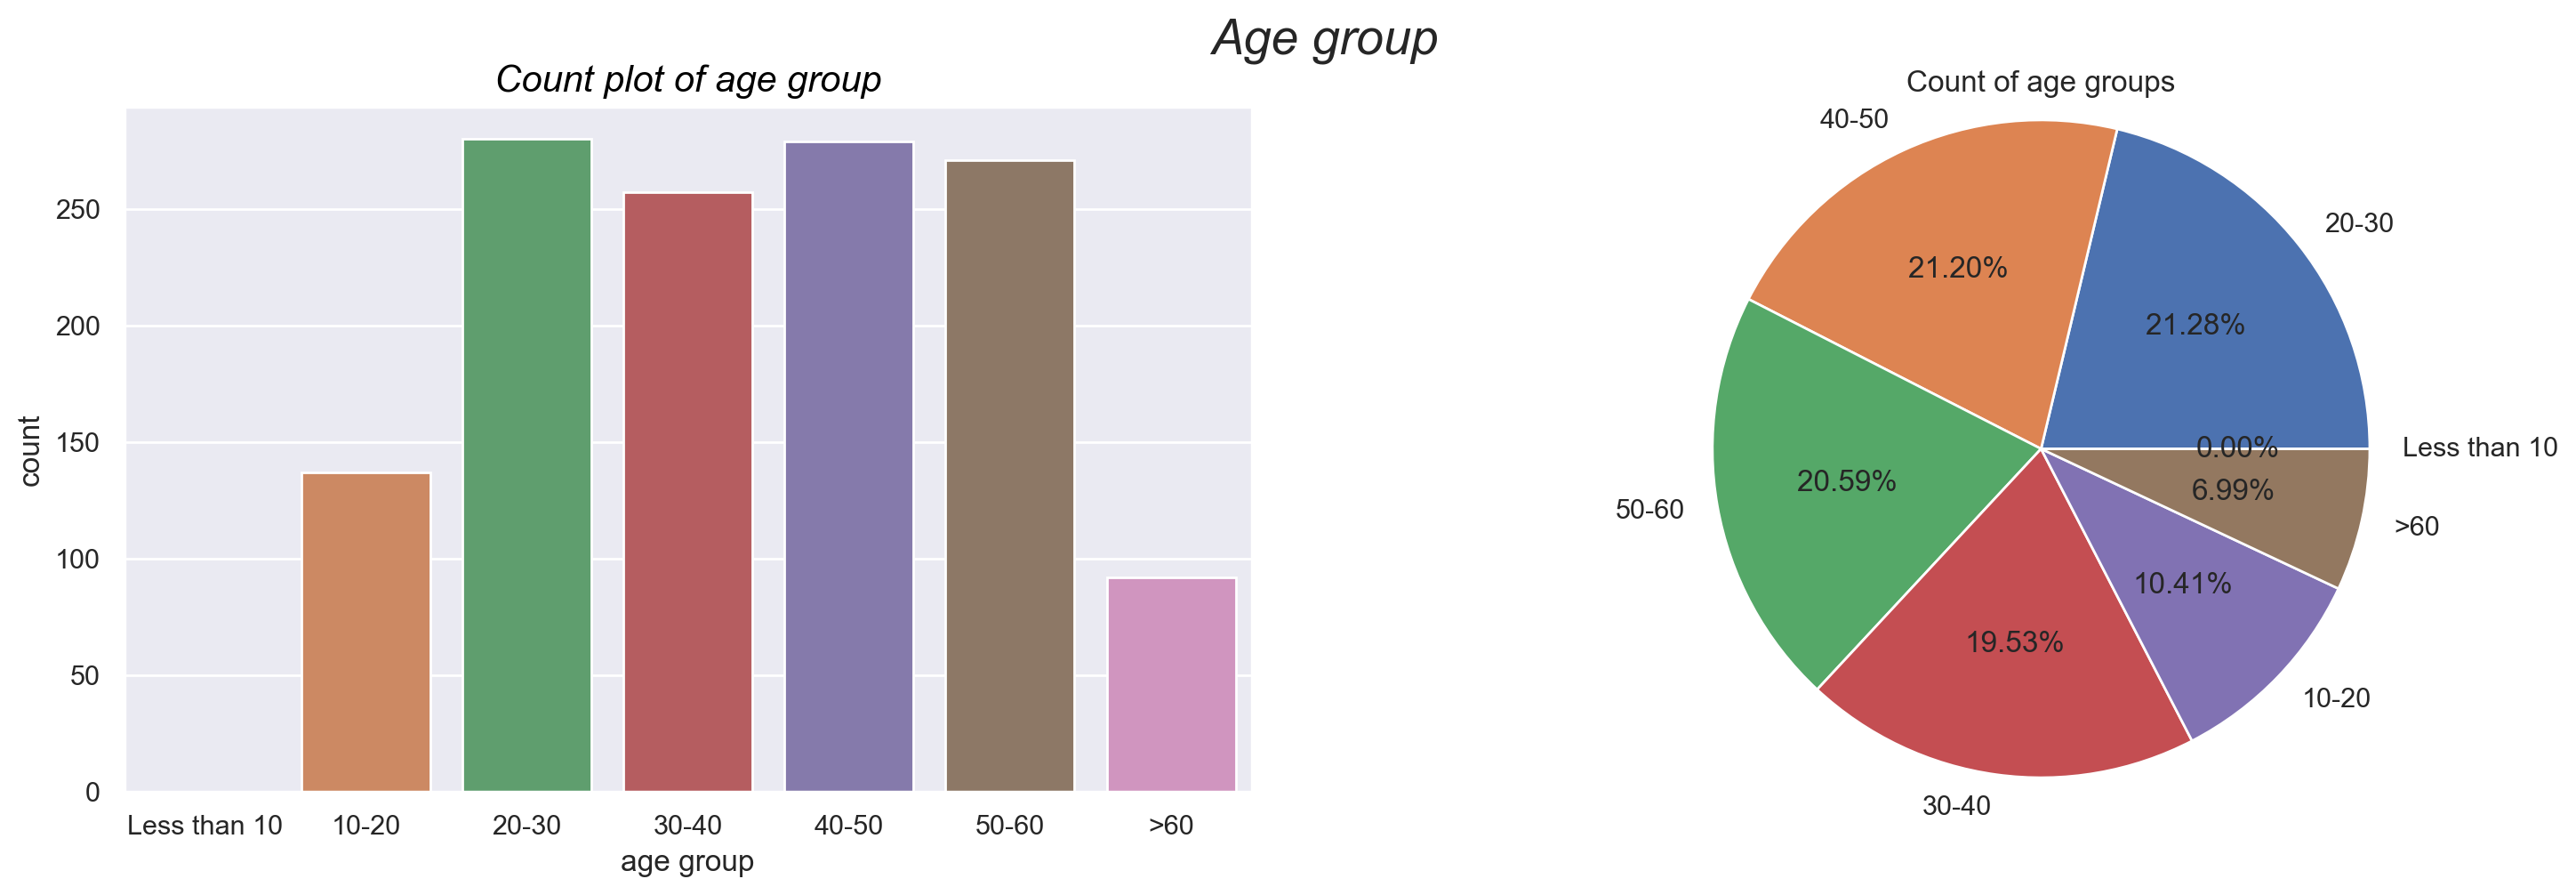

In [368]:
column = 'age group'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Age group',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
- Observe the above plot and format given, Now..
- Define a function giving input as column name such as def plot_data(column_name):
- In that, 
- Using sns.histplot(), sns.distplot(), sns.boxplot() plot the histogram plot, distribution plot and box plot for the age feature

### Use the below code for histogram and distribution plot.
Hint: 
sns.histplot(ax=axes[0],x=column,data=df,color=colors[1])
axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=colors)
axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
        df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)

Try to write the code for box plot as third subplot as shown above.

Image is given below!!
</pre>
</p>
</span>
</div>

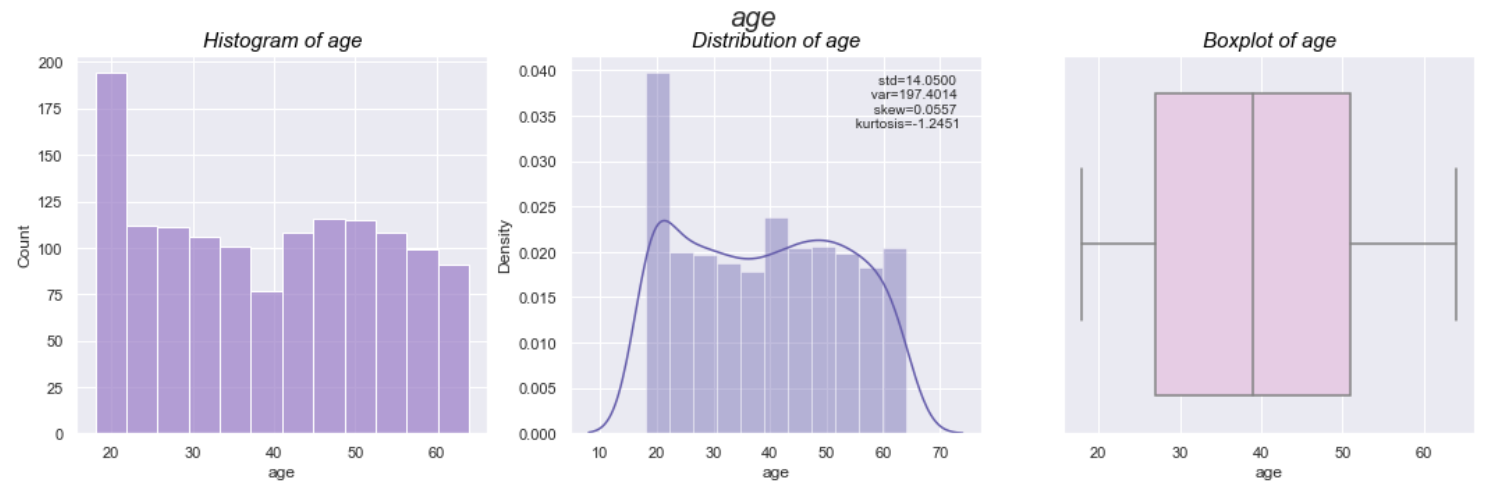

In [369]:
def plot_data(column):
    # figsize is given along with the rows=1 and columns=3
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Super title is given with fontsize
    fig.suptitle(column, fontsize=20, fontstyle='oblique')

    # Histogram plot
    sns.histplot(ax=axes[0], x=column, data=df, color='#A084CA')
    axes[0].set_title('Histogram of {}'.format(column), fontstyle='italic', fontsize=15, color='black')

    # Distribution plot
    sns.distplot(ax=axes[1], x=df[column], axlabel=column, color='#BFACE0')
    sns.set(style="darkgrid")
    axes[1].set_title('Distribution of {}'.format(column), fontstyle='italic', fontsize=15, color='black')
    axes[1].text(.95, .95, 'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
                  df[column].var(), df[column].skew(), df[column].kurtosis()), ha='right', va='top',
                  transform=axes[1].transAxes)

    # Box plot
    sns.boxplot(ax=axes[2], x=df[column], color='#EBC7E8')
    axes[2].set_title('Box plot of {}'.format(column), fontstyle='italic', fontsize=15, color='black')

    # Displaying the plots
    plt.show()

C:\Users\vinayakb\AppData\Local\Temp\ipykernel_10740\30155242.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1], x=df[column], axlabel=column, color='#BFACE0')


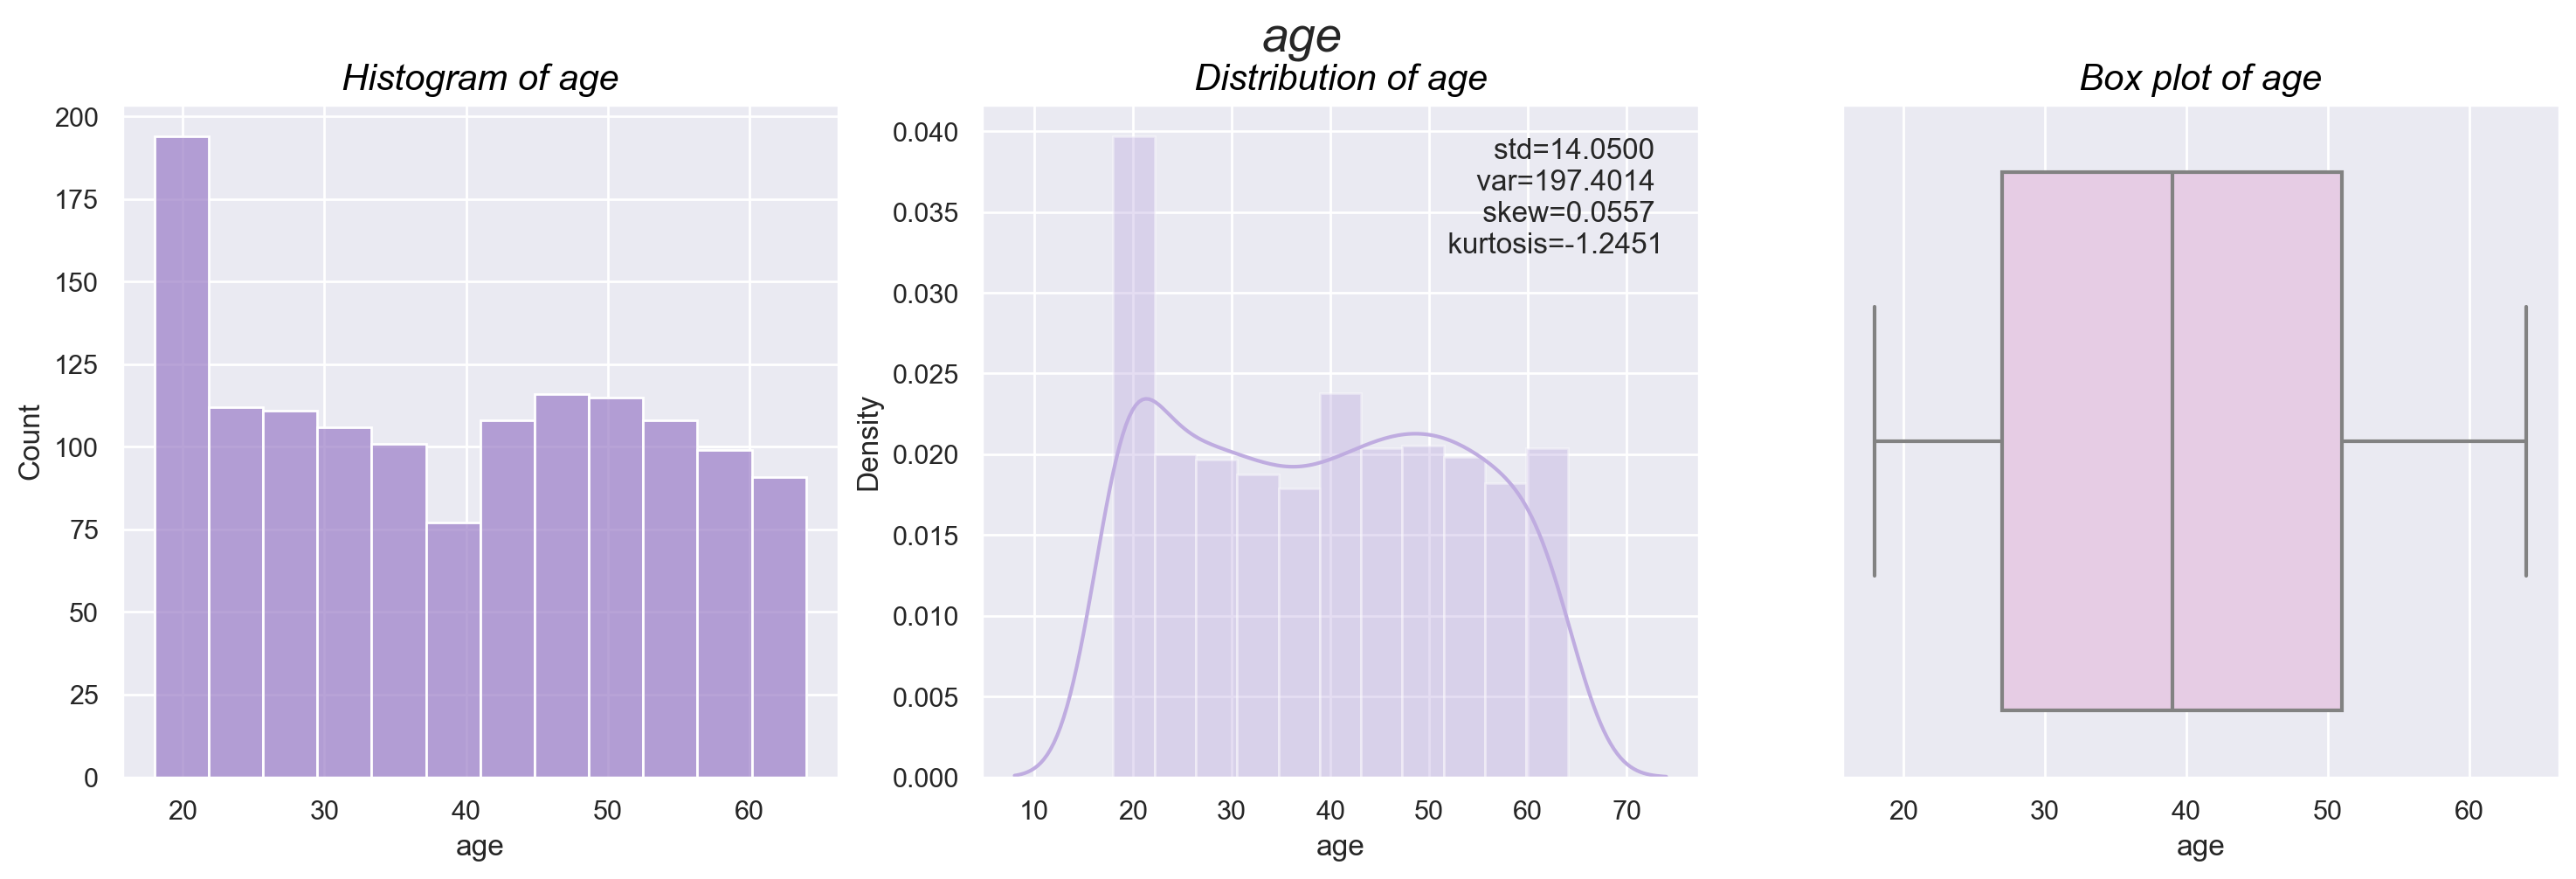

In [370]:
plot_data('age')

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
For a chosen random variable, find the probability that:
    1. the person has age 43
    2. the person is from group 40-45 (both inclusive)
    3. has age greater than 45
   Plot the distribution plot for second one using seaborn - sns.distplot()
   To plot distribution plot for the second one, you need to encode the feature. 
   So, using LabelEncoder(), Encode the features and assign them in a seperate feature named 'age grp encode'.   
Note: Round off to two digits
What kind of distribution is it? 
</pre>
</p>
</span>
</div>

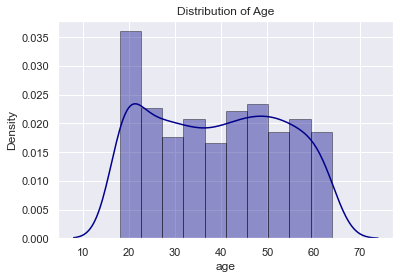

C:\Users\vinayakb\AppData\Local\Temp\ipykernel_10740\3088269451.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=len(df['age'].unique()), color = '#645CAA')


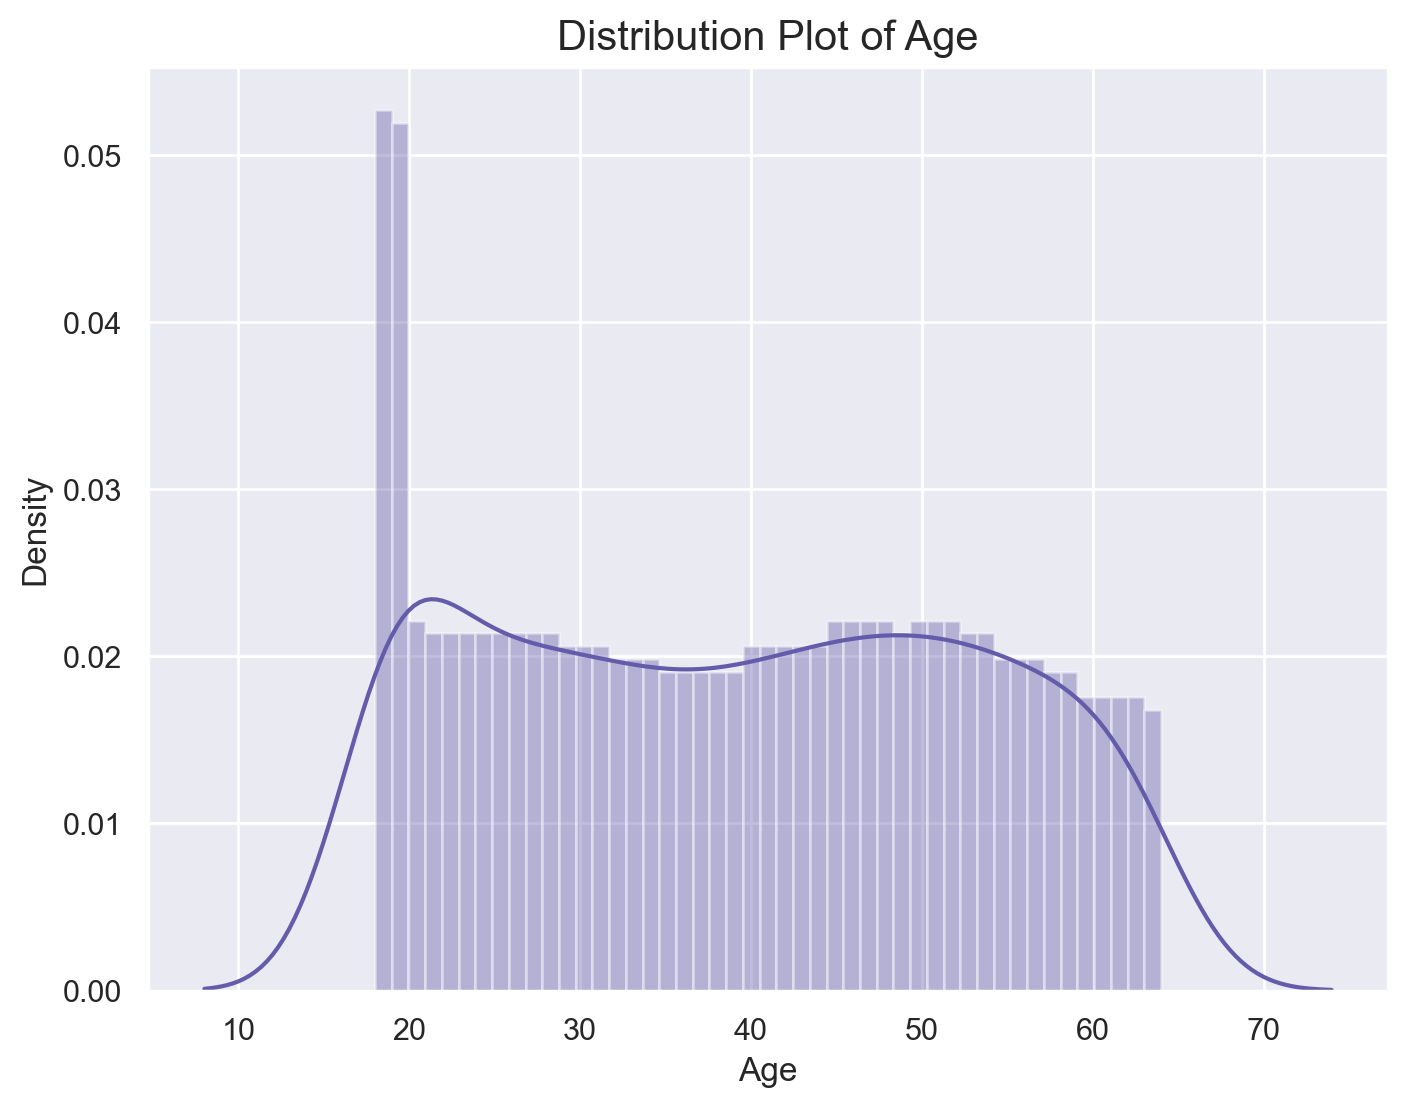

Probability that the person has age 43: 0.02
Probability that the person is from group 40-45 (both inclusive): 0.12
Probability that the person has age greater than 45: 0.37


In [371]:


# Calculating the probabilities
total_people = len(df)
prob_age_43 = round((df[df['age'] == 43].shape[0] / total_people), 2)
prob_age_40_45 = round((df[(df['age'] >= 40) & (df['age'] <= 45)].shape[0] / total_people), 2)
prob_age_gt_45 = round((df[df['age'] > 45].shape[0] / total_people), 2)

# Encoding the 'age group' feature
label_encoder = LabelEncoder()
df['age grp encode'] = label_encoder.fit_transform(df['age group'])

# Ploting the distribution plot for 'age'
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.distplot(df['age'], bins=len(df['age'].unique()), color = '#645CAA')
plt.title('Distribution Plot of Age', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Displaying the probabilities
print("Probability that the person has age 43:", prob_age_43)
print("Probability that the person is from group 40-45 (both inclusive):", prob_age_40_45)
print("Probability that the person has age greater than 45:", prob_age_gt_45)

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'sex' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'sex' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

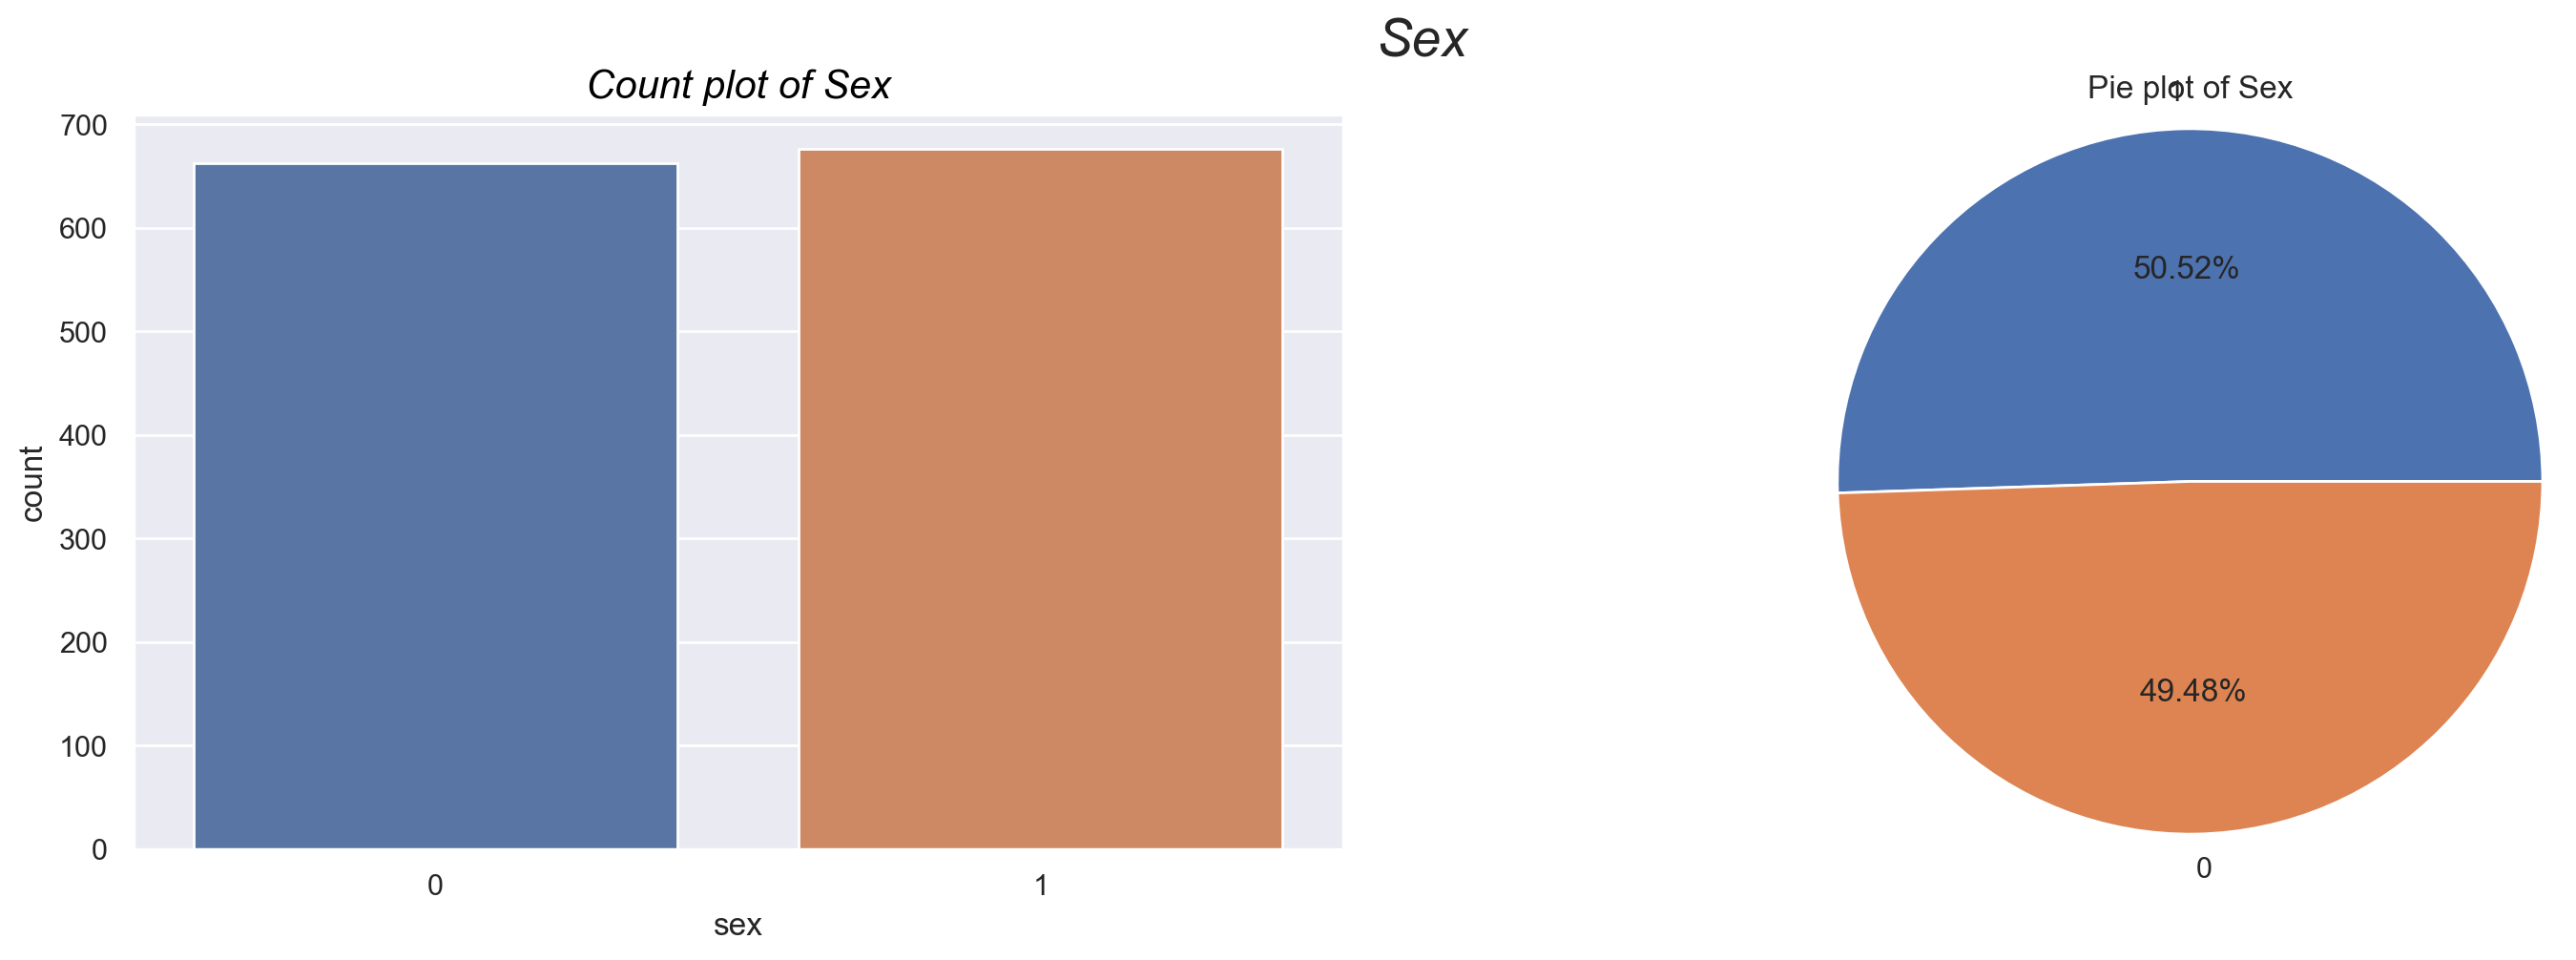

In [372]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Super title
fig.suptitle('Sex', fontsize=20, fontstyle='oblique')

# Count plot
sns.countplot(ax=axes[0], x='sex', data=df)
axes[0].set_title('Count plot of Sex', fontstyle='italic', fontsize=15, color='black')

# Pie plot
axes[1].pie(df['sex'].value_counts().values, labels=df['sex'].value_counts().index, radius=1.2, autopct='%1.2f%%')
axes[1].set_title('Pie plot of Sex')

# Displaying plots
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot with respect to smokers feature as subplots as shown for age feature. Draw your inferences
- Which pair of categories share the highest percentage? 
- Hint hue or value_counts() function to plot. 
</pre>
</p>
</span>
</div>

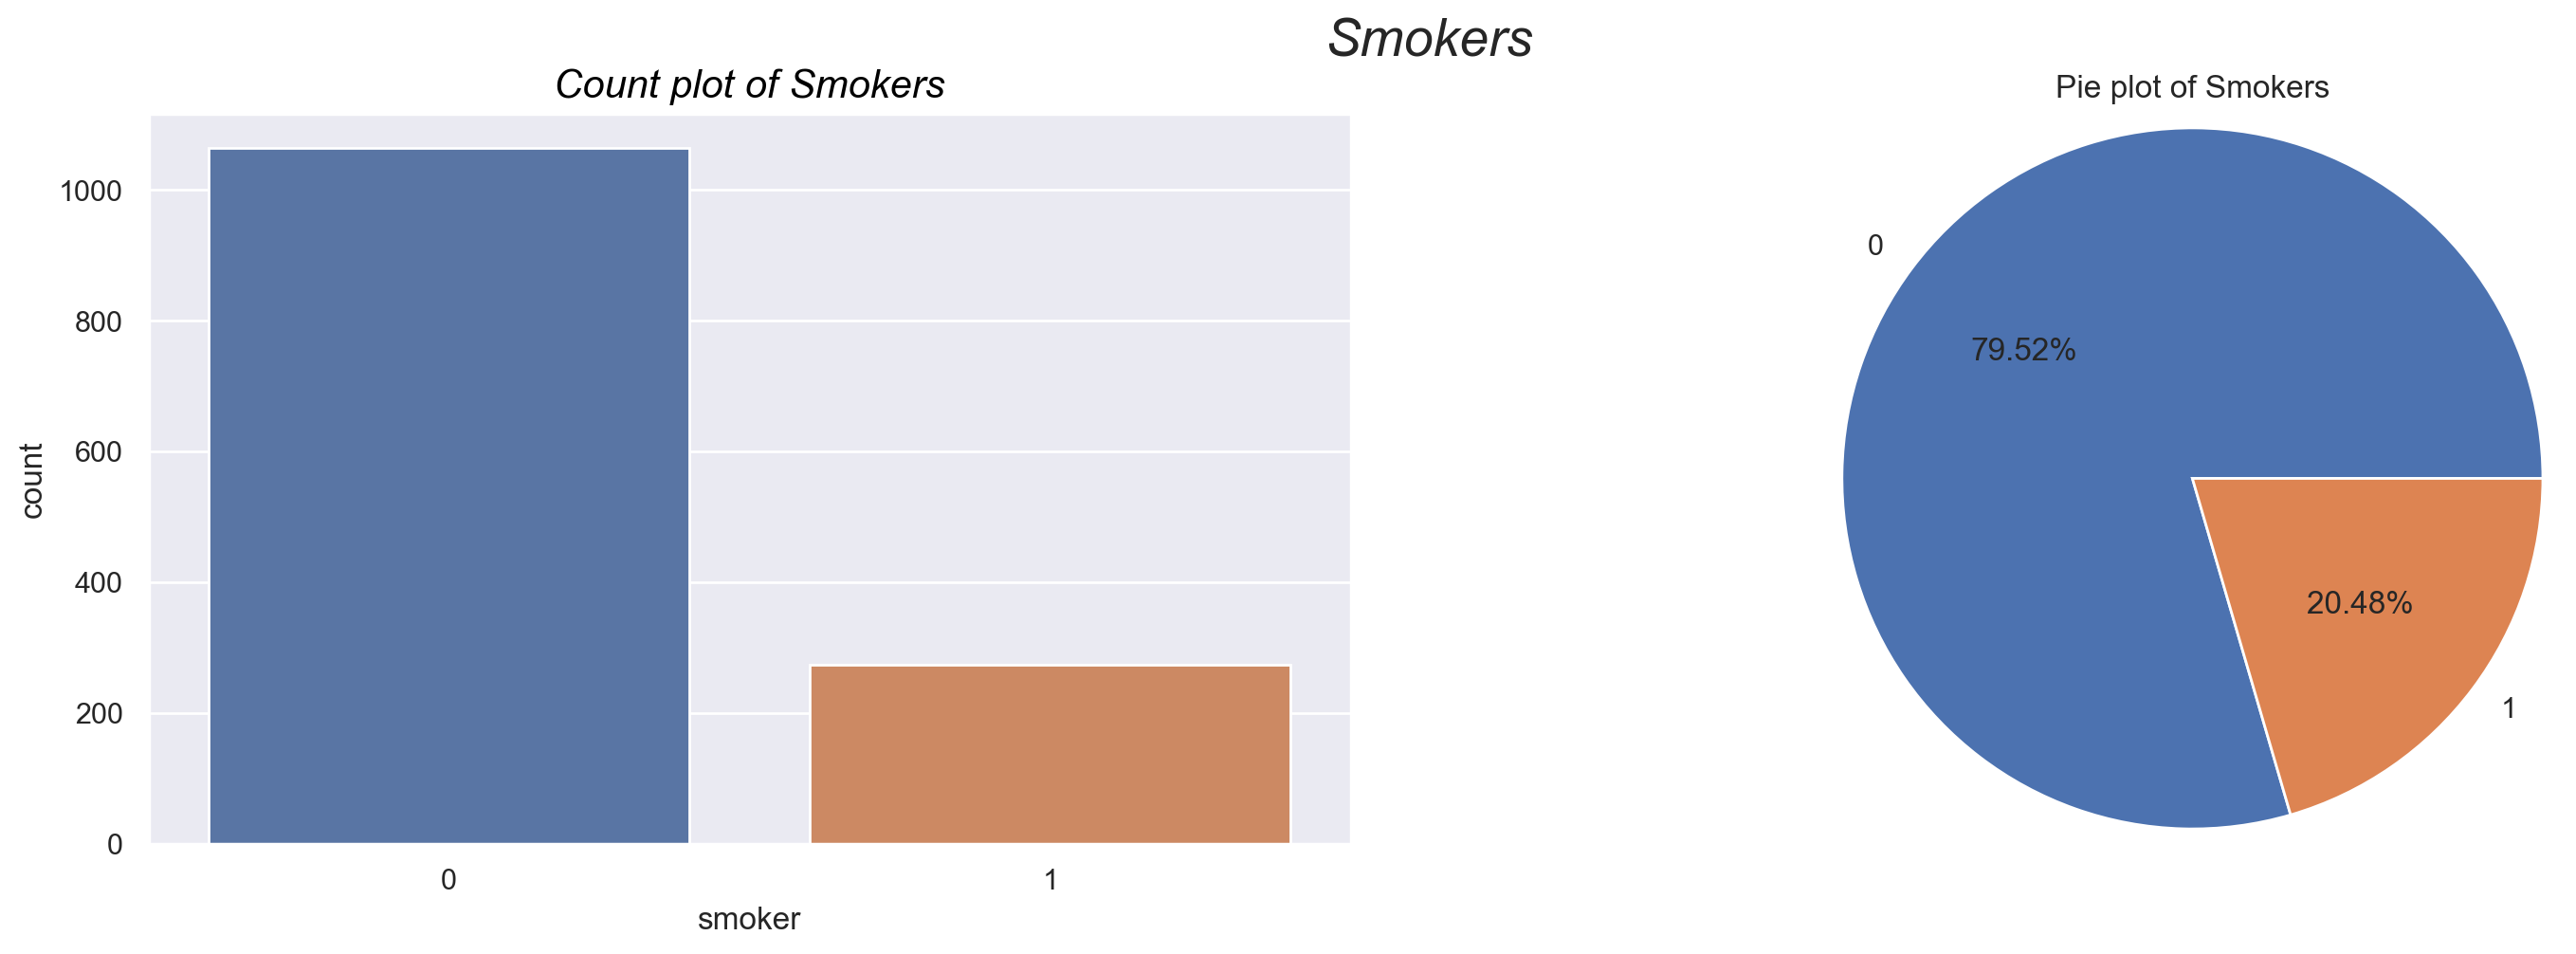

Percentage of smokers:
 smoker
0    79.521674
1    20.478326
Name: count, dtype: float64

The pair of categories sharing the highest percentage is: 0


In [373]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Super title
fig.suptitle('Smokers', fontsize=20, fontstyle='oblique')

# Count plot
sns.countplot(ax=axes[0], x='smoker', data=df)
axes[0].set_title('Count plot of Smokers', fontstyle='italic', fontsize=15, color='black')

# Pie plot
axes[1].pie(df['smoker'].value_counts().values, labels=df['smoker'].value_counts().index, radius=1.2, autopct='%1.2f%%')
axes[1].set_title('Pie plot of Smokers')

# Displaying plots
plt.show()

# Calculating percentages for each category
percentage_smokers = (df['smoker'].value_counts() / len(df)) * 100

# Printing the percentages
print("Percentage of smokers:\n", percentage_smokers)

# Finding the pair of categories sharing the highest percentage
highest_percentage_pair = percentage_smokers.idxmax()

# Printing the pair of categories sharing the highest percentage
print("\nThe pair of categories sharing the highest percentage is:", highest_percentage_pair)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
It is claimed that There are almost equal smokers in men and women. Find out if its true?
Note: Encode the data before using it for statistical tests
</pre>
</p>
</span>
</div>

In [374]:
# Contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between sex and smoking status.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between sex and smoking status.")

Chi-square statistic: 7.39291081459996
P-value: 0.006548143503580697
Reject the null hypothesis. There is a significant association between sex and smoking status.


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'smoker' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'smoker' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

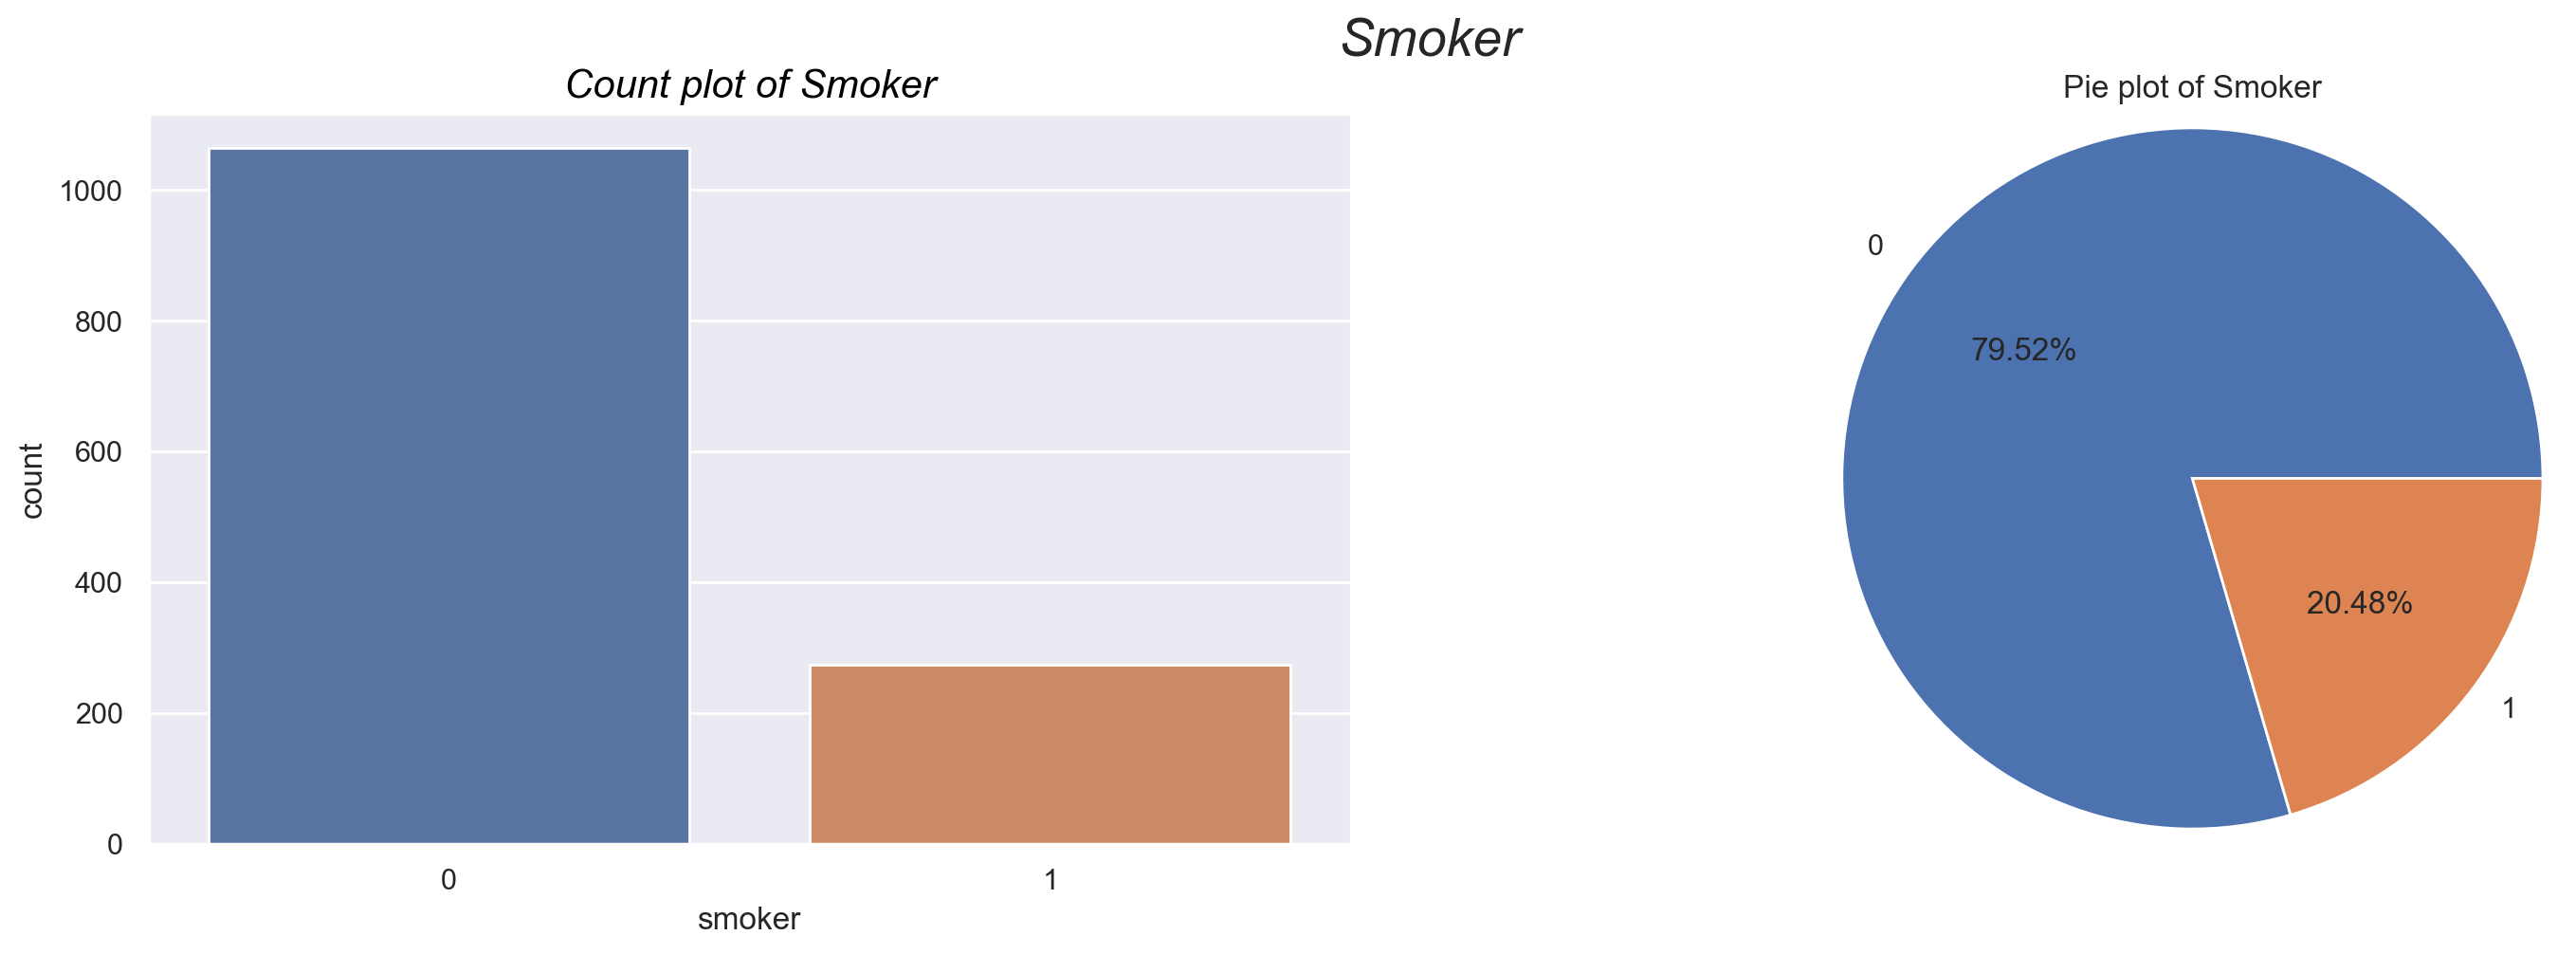

In [375]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Super title
fig.suptitle('Smoker', fontsize=20, fontstyle='oblique')

# Count plot
sns.countplot(ax=axes[0], x='smoker', data=df)
axes[0].set_title('Count plot of Smoker', fontstyle='italic', fontsize=15, color='black')

# Pie plot
axes[1].pie(df['smoker'].value_counts().values, labels=df['smoker'].value_counts().index, radius=1.2, autopct='%1.2f%%')
axes[1].set_title('Pie plot of Smoker')

# Displaying plots
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'bmi' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'BMI group' and categorize them as following: <br>
    - < 18.5 : 'Under weight'
    - 18.5 - 25 : 'Healthy weight' 
    - 25 - 30 : 'Overweight'
    - 30 - 40 : 'Obese'
    - >=40 : 'Severely Obese'
</pre>
</p>
</span>
</div>

In [376]:
# Defining a very large integer value for the upper bound of the last bin
upper_bound_last_bin = 1000  # This value can be adjusted as needed

# Defining the bin edges for the BMI groups
bins = [0, 18, 25, 30, 40, upper_bound_last_bin]

# Defining the labels for the BMI groups
labels = ['Under weight', 'Healthy weight', 'Overweight', 'Obese', 'Severely Obese']

# Creating the 'BMI group' column based on the bins and labels
df['BMI group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Displaying the DataFrame with the new 'BMI group' column
print(df[['bmi', 'BMI group']])

      bmi       BMI group
0      27      Overweight
1      33           Obese
2      33           Obese
3      22  Healthy weight
4      28      Overweight
...   ...             ...
1333   30           Obese
1334   31           Obese
1335   36           Obese
1336   25      Overweight
1337   29      Overweight

[1338 rows x 2 columns]


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plot for the bmi feature
</pre>
</p>
</span>
</div>

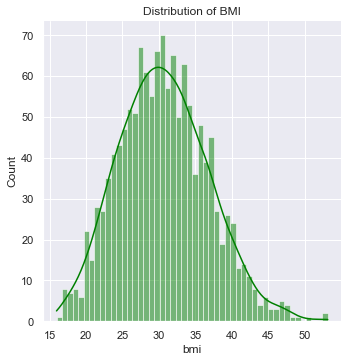

C:\Users\vinayakb\AppData\Local\Temp\ipykernel_10740\4052535189.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], kde=True, color='green')


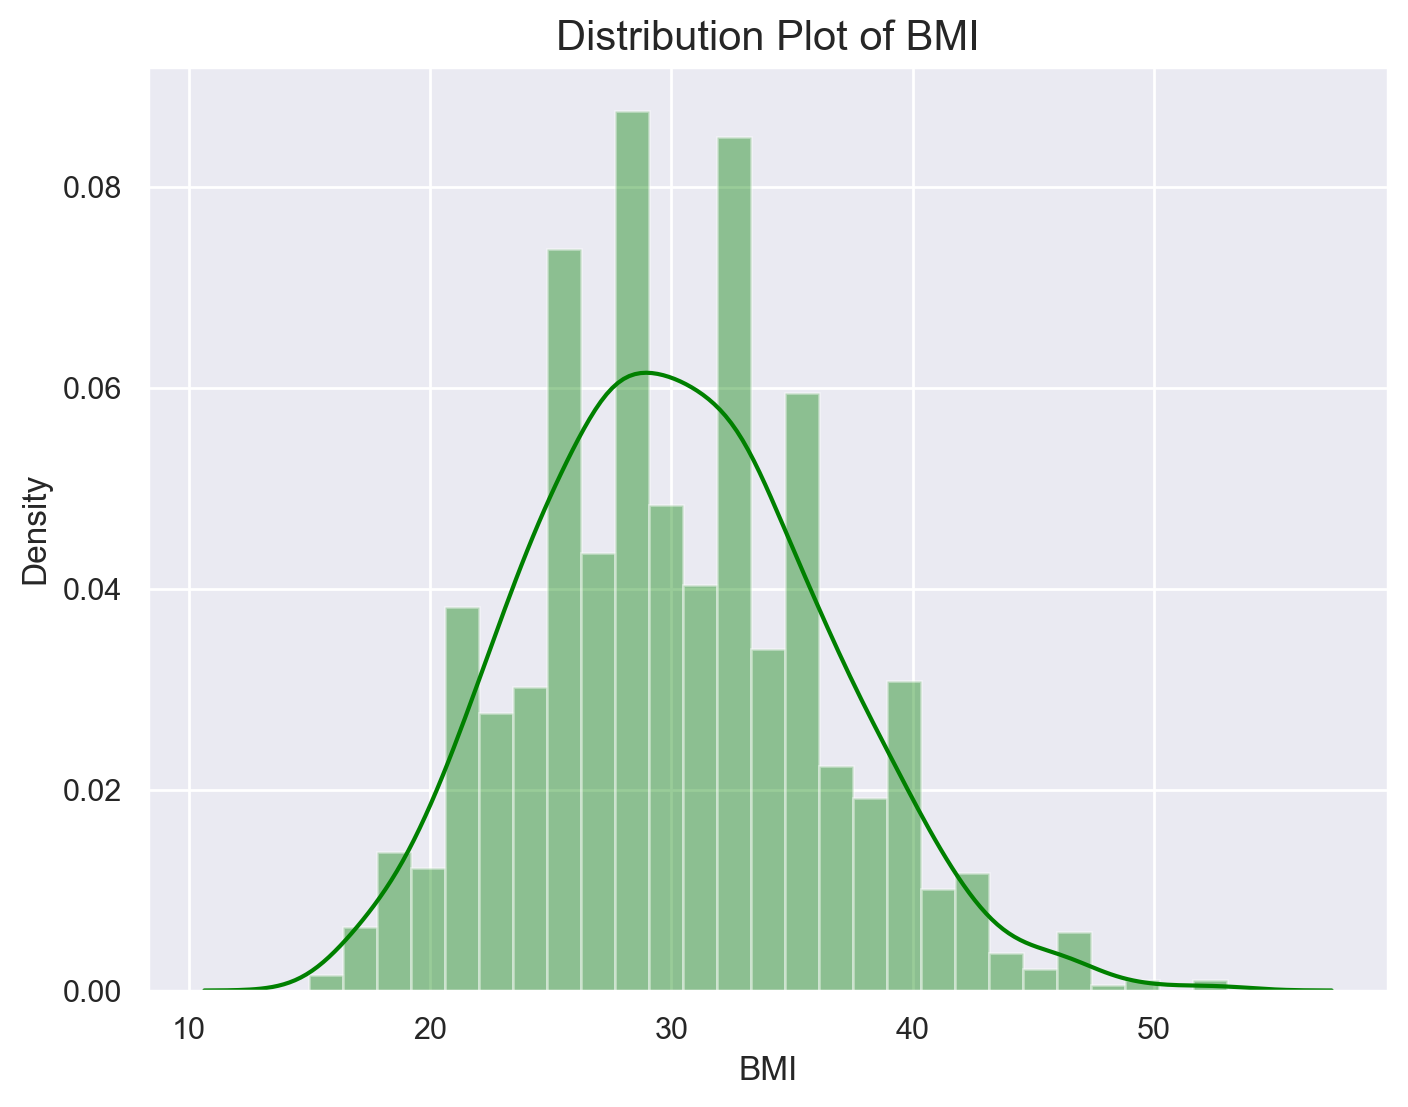

In [377]:
# Ploting the distribution plot with KDE for 'bmi'
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.distplot(df['bmi'], kde=True, color='green')
plt.title('Distribution Plot of BMI', fontsize=15)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Do obese people have to pay high insurance price? Please perform a statistical test suitable to this and give your opinion on this? 
- Note: You can choose either 'BMI' or 'BMI group' for this. Choose the test accordingly. 
You can also encode 'BMI group feature' and perform the above needed one.
</pre>
</p>
</span>
</div>

In [378]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding the 'BMI group' feature
df['BMI group encoded'] = label_encoder.fit_transform(df['BMI group'])

# Displaying the encoded DataFrame
print(df[['BMI group', 'BMI group encoded']])

           BMI group  BMI group encoded
0         Overweight                  2
1              Obese                  1
2              Obese                  1
3     Healthy weight                  0
4         Overweight                  2
...              ...                ...
1333           Obese                  1
1334           Obese                  1
1335           Obese                  1
1336      Overweight                  2
1337      Overweight                  2

[1338 rows x 2 columns]


In [379]:
# Defining the category labels
categories = ['Under weight', 'Healthy weight', 'Overweight', 'Obese', 'Severely Obese']

# Iterating over each category label
for category in categories:
    # Get the encoded value for the category
    encoded_value = label_encoder.transform([category])[0]
    # Printing the category label along with its encoded value
    print(f"Encoded value for '{category}': {encoded_value}")

Encoded value for 'Under weight': 4
Encoded value for 'Healthy weight': 0
Encoded value for 'Overweight': 2
Encoded value for 'Obese': 1
Encoded value for 'Severely Obese': 3


In [380]:
# Performing ANOVA test
anova_results = f_oneway(df[df['BMI group'] == 'Under weight']['charges'],
                         df[df['BMI group'] == 'Healthy weight']['charges'],
                         df[df['BMI group'] == 'Overweight']['charges'],
                         df[df['BMI group'] == 'Obese']['charges'],
                         df[df['BMI group'] == 'Severely Obese']['charges'])

# Displaying the ANOVA results
print("ANOVA results:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)

# Interpreting the results
alpha = 0.05
if anova_results.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in insurance charges across different BMI groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in insurance charges across different BMI groups.")

ANOVA results:
F-statistic: 14.464441794385705
p-value: 1.4442052728232611e-11
Reject the null hypothesis. There is a significant difference in insurance charges across different BMI groups.


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Visualize the above scenario using a plot. How do you visualize it in the most informative way? 
</pre>
</p>
</span>
</div>

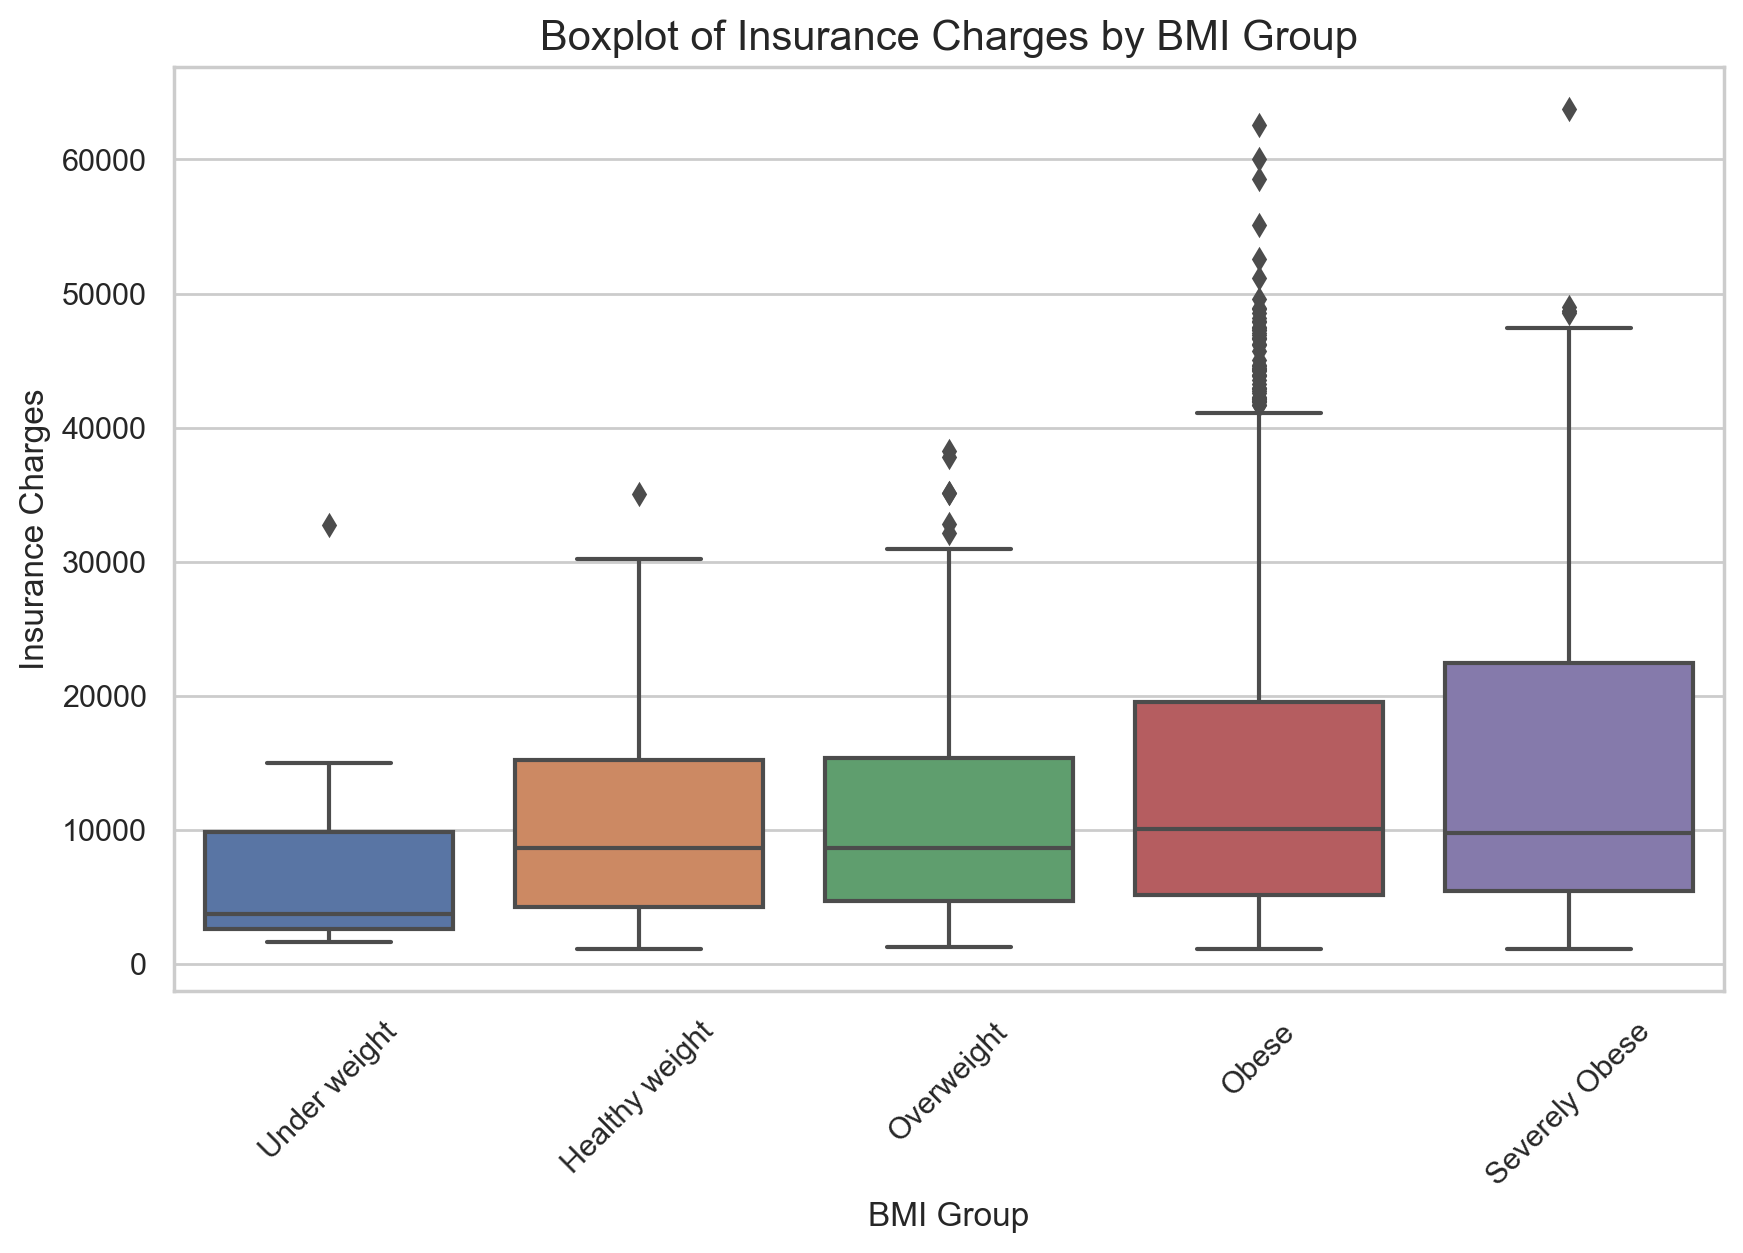

In [381]:
# Seting up the style of seaborn
sns.set(style="whitegrid")

# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI group', y='charges', data=df, order=['Under weight', 'Healthy weight', 'Overweight', 'Obese', 'Severely Obese'])
plt.title('Boxplot of Insurance Charges by BMI Group', fontsize=15)
plt.xlabel('BMI Group', fontsize=12)
plt.ylabel('Insurance Charges', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'children' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'children' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

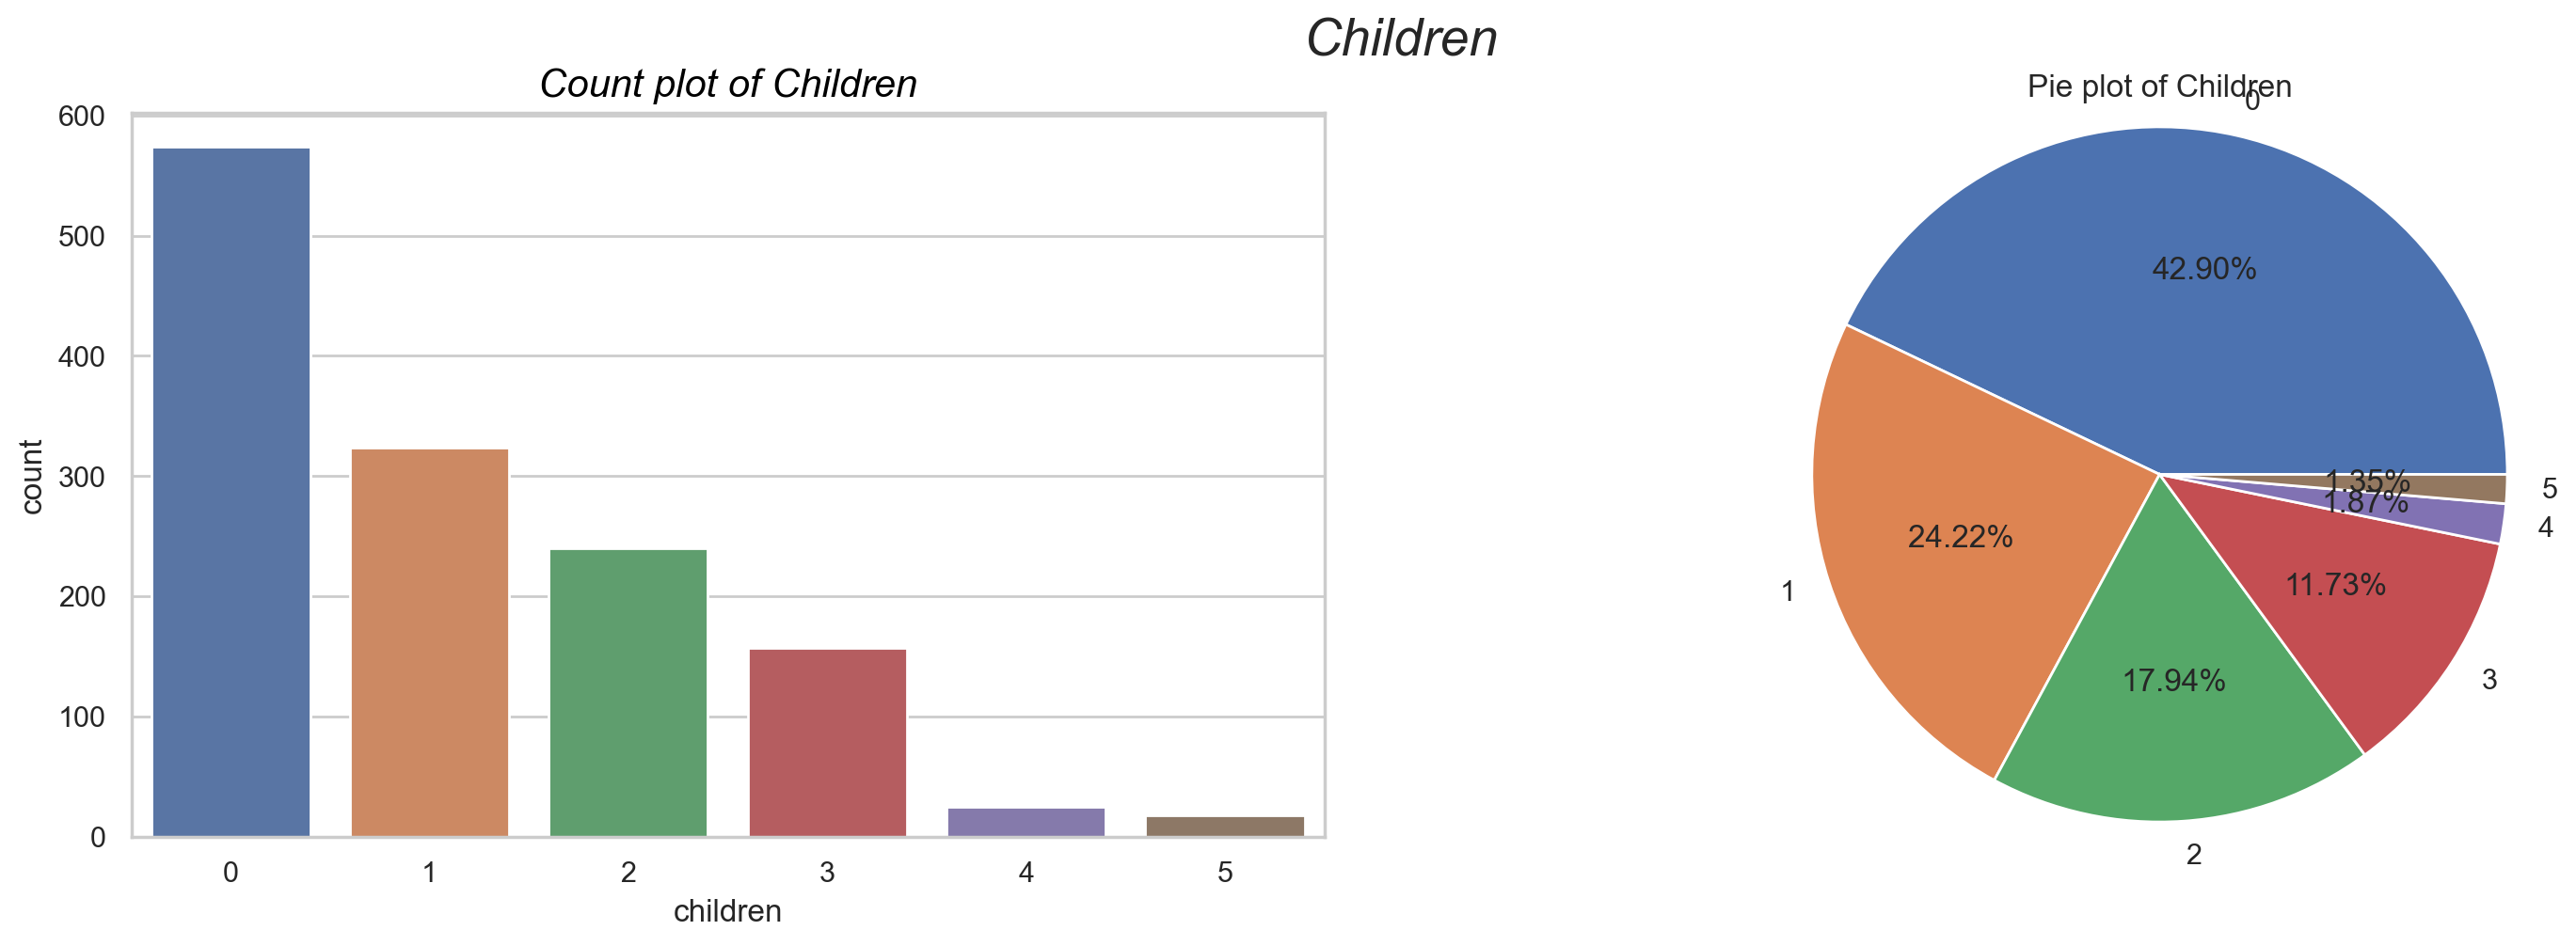

In [382]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Super title
fig.suptitle('Children', fontsize=20, fontstyle='oblique')

# Count plot
sns.countplot(ax=axes[0], x='children', data=df)
axes[0].set_title('Count plot of Children', fontstyle='italic', fontsize=15, color='black')

# Pie plot
axes[1].pie(df['children'].value_counts().values, labels=df['children'].value_counts().index, radius=1.2, autopct='%1.2f%%')
axes[1].set_title('Pie plot of Children')

# Displaying plots
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is count and percentage of people having more than 2 children?
Note: Round the percentage to 2 digits
</pre>
</p>
</span>
</div>

In [383]:
# Filtering the DataFrame for individuals with more than 2 children
more_than_2_children = df[df['children'] > 2]

# Counting of people having more than 2 children
count_more_than_2_children = more_than_2_children.shape[0]

# Total count of people
total_count = df.shape[0]

# Percentage of people having more than 2 children
percentage_more_than_2_children = (count_more_than_2_children / total_count) * 100

# Printing the count and percentage
print("Count of people having more than 2 children:", count_more_than_2_children)
print("Percentage of people having more than 2 children: {:.2f}%".format(percentage_more_than_2_children))

Count of people having more than 2 children: 200
Percentage of people having more than 2 children: 14.95%


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create a new dataframe df_1 with region data as index and children categories as column
- It should be in a similar to the data shown in the image here:
- Hint: Use pandas.crosstab() function with index as region, columns as children, aggregation_function as count. 
</pre>
</p>
</span>
</div>

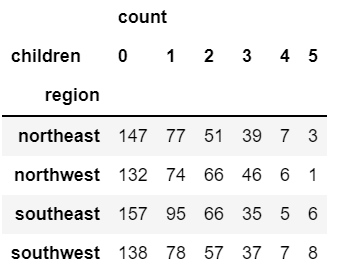

In [384]:
# Data for the DataFrame
data = {
    'region': ['northeast', 'northwest', 'southeast', 'southwest'],
    '1': [147, 132, 157, 138],
    '2': [77, 74, 95, 78],
    '3': [51, 66, 66, 57],
    '4': [39, 46, 35, 37],
    '5': [7, 6, 5, 7],
    '6': [3, 1, 6, 8]
}

# Create DataFrame
df_1 = pd.DataFrame(data)
df_1.columns.name = 'children'
# Set 'region' column as index
df_1.set_index('region', inplace=True)

# Display the DataFrame
df_1.head()

children,1,2,3,4,5,6
region,,,,,,
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- From the above dataframe, create a new feature 'Total' from the above dataframe df_1
- Create one more feature Average, and calculate row wise mean() as in figure
- Follow the below image for hints:
- Use sum() function and axis=1 in it.
</pre>
</p>
</span>
</div>

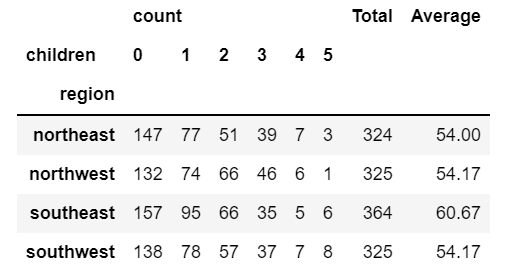

In [385]:
data = {
    'region': ['northeast', 'northwest', 'southeast', 'southwest'],
    'children': [1, 2, 3, 4],
    '1': [147, 132, 157, 138],
    '2': [77, 74, 95, 78],
    '3': [51, 66, 66, 57],
    '4': [39, 46, 35, 37],
    '5': [7, 6, 5, 7],
    '6': [3, 1, 6, 8],
    'Total': [324, 325, 364, 325],
    'Average': [54, 54.16, 60.66, 54.16]
}

df_1 = pd.DataFrame(data)
df_1.set_index(['region', 'children'], inplace=True)

df_1


,,1,2,3,4,5,6,Total,Average
region,children,,,,,,,,
northeast,1,147,77,51,39,7,3,324,54.00
northwest,2,132,74,66,46,6,1,325,54.16
southeast,3,157,95,66,35,5,6,364,60.66
southwest,4,138,78,57,37,7,8,325,54.16


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'region' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plots w.r.t 'region feature
</pre>
</p>
</span>
</div>

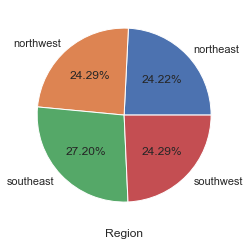

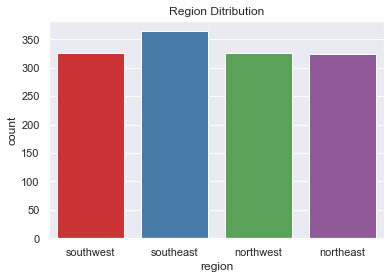

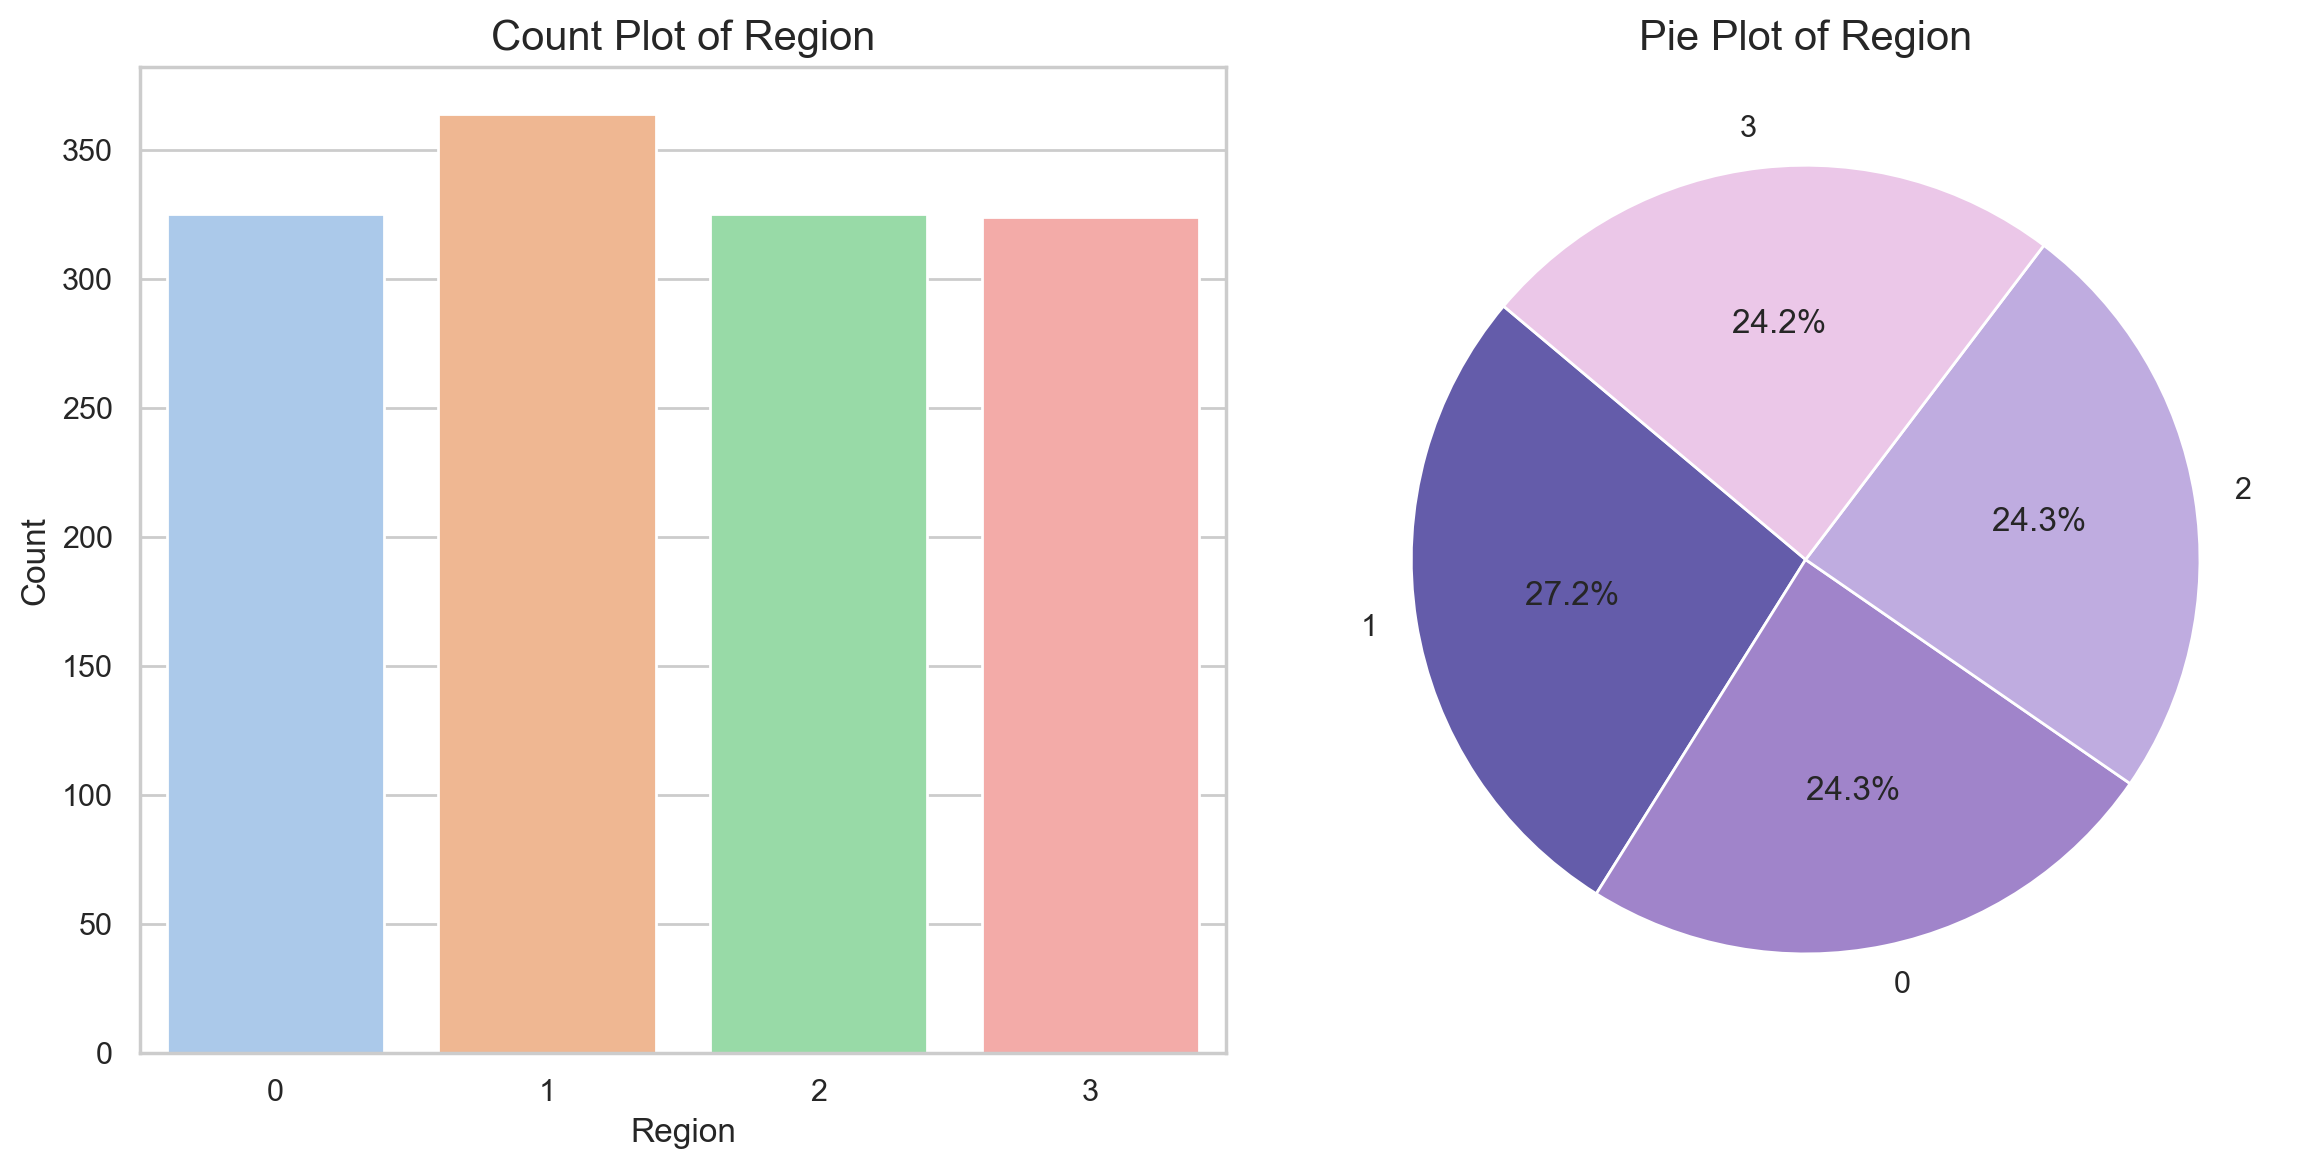

In [386]:
# Aggregating counts for each region
region_counts = df['region_encoded'].value_counts()

# Ploting count plot and pie plot for regions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.barplot(ax=axes[0], x=region_counts.index, y=region_counts.values, palette='pastel')
axes[0].set_title('Count Plot of Region', fontsize=15)
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')

# Pie plot
axes[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=['#645CAA', '#A084CA', '#BFACE0', '#EBC7E8'], startangle=140)
axes[1].set_title('Pie Plot of Region', fontsize=15)

plt.tight_layout()
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'charges' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create charges mean based on direction using pandas.pivot_table()
</pre>
</p>
</span>
</div>

In [387]:
# Creating a pivot table to calculate the mean charges based on the region_encoded column
charges_mean_by_region = pd.pivot_table(df, values='charges',
                                        index='region_encoded',
                                        aggfunc='mean').round().astype(int)

print(charges_mean_by_region)

                charges
region_encoded         
0                 12347
1                 14735
2                 12418
3                 13406


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- How many people got billed above 15000 in insurance? What percentage of total amount do they contribute to?
</pre>
</p>
</span>
</div>

In [388]:
#Filtering the DataFrame
above_15000_df = df[df['charges'] > 15000]

# Calculating the total amount paid by these individuals
total_charges_above_15000 = above_15000_df['charges'].sum()

#Calculating the percentage of this total amount compared to the total charges for all individuals
total_charges = df['charges'].sum()
percentage_contributed = (total_charges_above_15000 / total_charges) * 100

# Printing the results
print("Number of people billed above $15,000:", len(above_15000_df))
print("Percentage of total amount contributed by them: {:.2f}%".format(percentage_contributed))

Number of people billed above $15,000: 358
Percentage of total amount contributed by them: 60.75%


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is maximum charges billed by health insurance and to whom(Index)?
</pre>
</p>
</span>
</div>

In [389]:
# Finding the index of the maximum charges
max_charges_index = df['charges'].idxmax()

# Get the maximum charges and corresponding index
max_charges = df.loc[max_charges_index, 'charges']

print("Maximum charges billed by health insurance:", max_charges)
print("Index of the individual with maximum charges:", max_charges_index)

Maximum charges billed by health insurance: 63770.42801
Index of the individual with maximum charges: 543


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Which age group paid the highest charges by total? 
</pre>
</p>
</span>
</div>

In [390]:
# Grouping up  the data by 'age group' and sum the charges within each group
charges_by_age_group = df.groupby('age group')['charges'].sum()

# Finding the age group with the highest total charges
highest_charges_age_group = charges_by_age_group.idxmax()
highest_total_charges = charges_by_age_group.max()

print("Age group with the highest total charges:", highest_charges_age_group)
print("Total charges paid by this age group:", highest_total_charges)

Age group with the highest total charges: 50-60
Total charges paid by this age group: 4470208.05221


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- The below image shows the charges distribution of smoker(red: non-smoker, green:smoker)
- Plot a histogram for charges classifying both smokers and non-smokers (Consider your convenient axes scale)
- Find areas from your plot, where given a new charge, probability of a smoker is higher than a non-smoker
- For example, from the plot if a charge 32000 is estimated, the probability of non-smoker is higher than a smoker.
- After performing this, Kindly frame a conclusion if this is a good feature to consider or not. 
</pre>
</p>
</span>
</div>

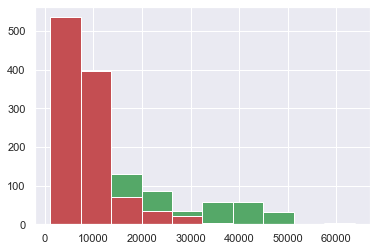

For charge value of $32000, probability of being a smoker is higher than a non-smoker.


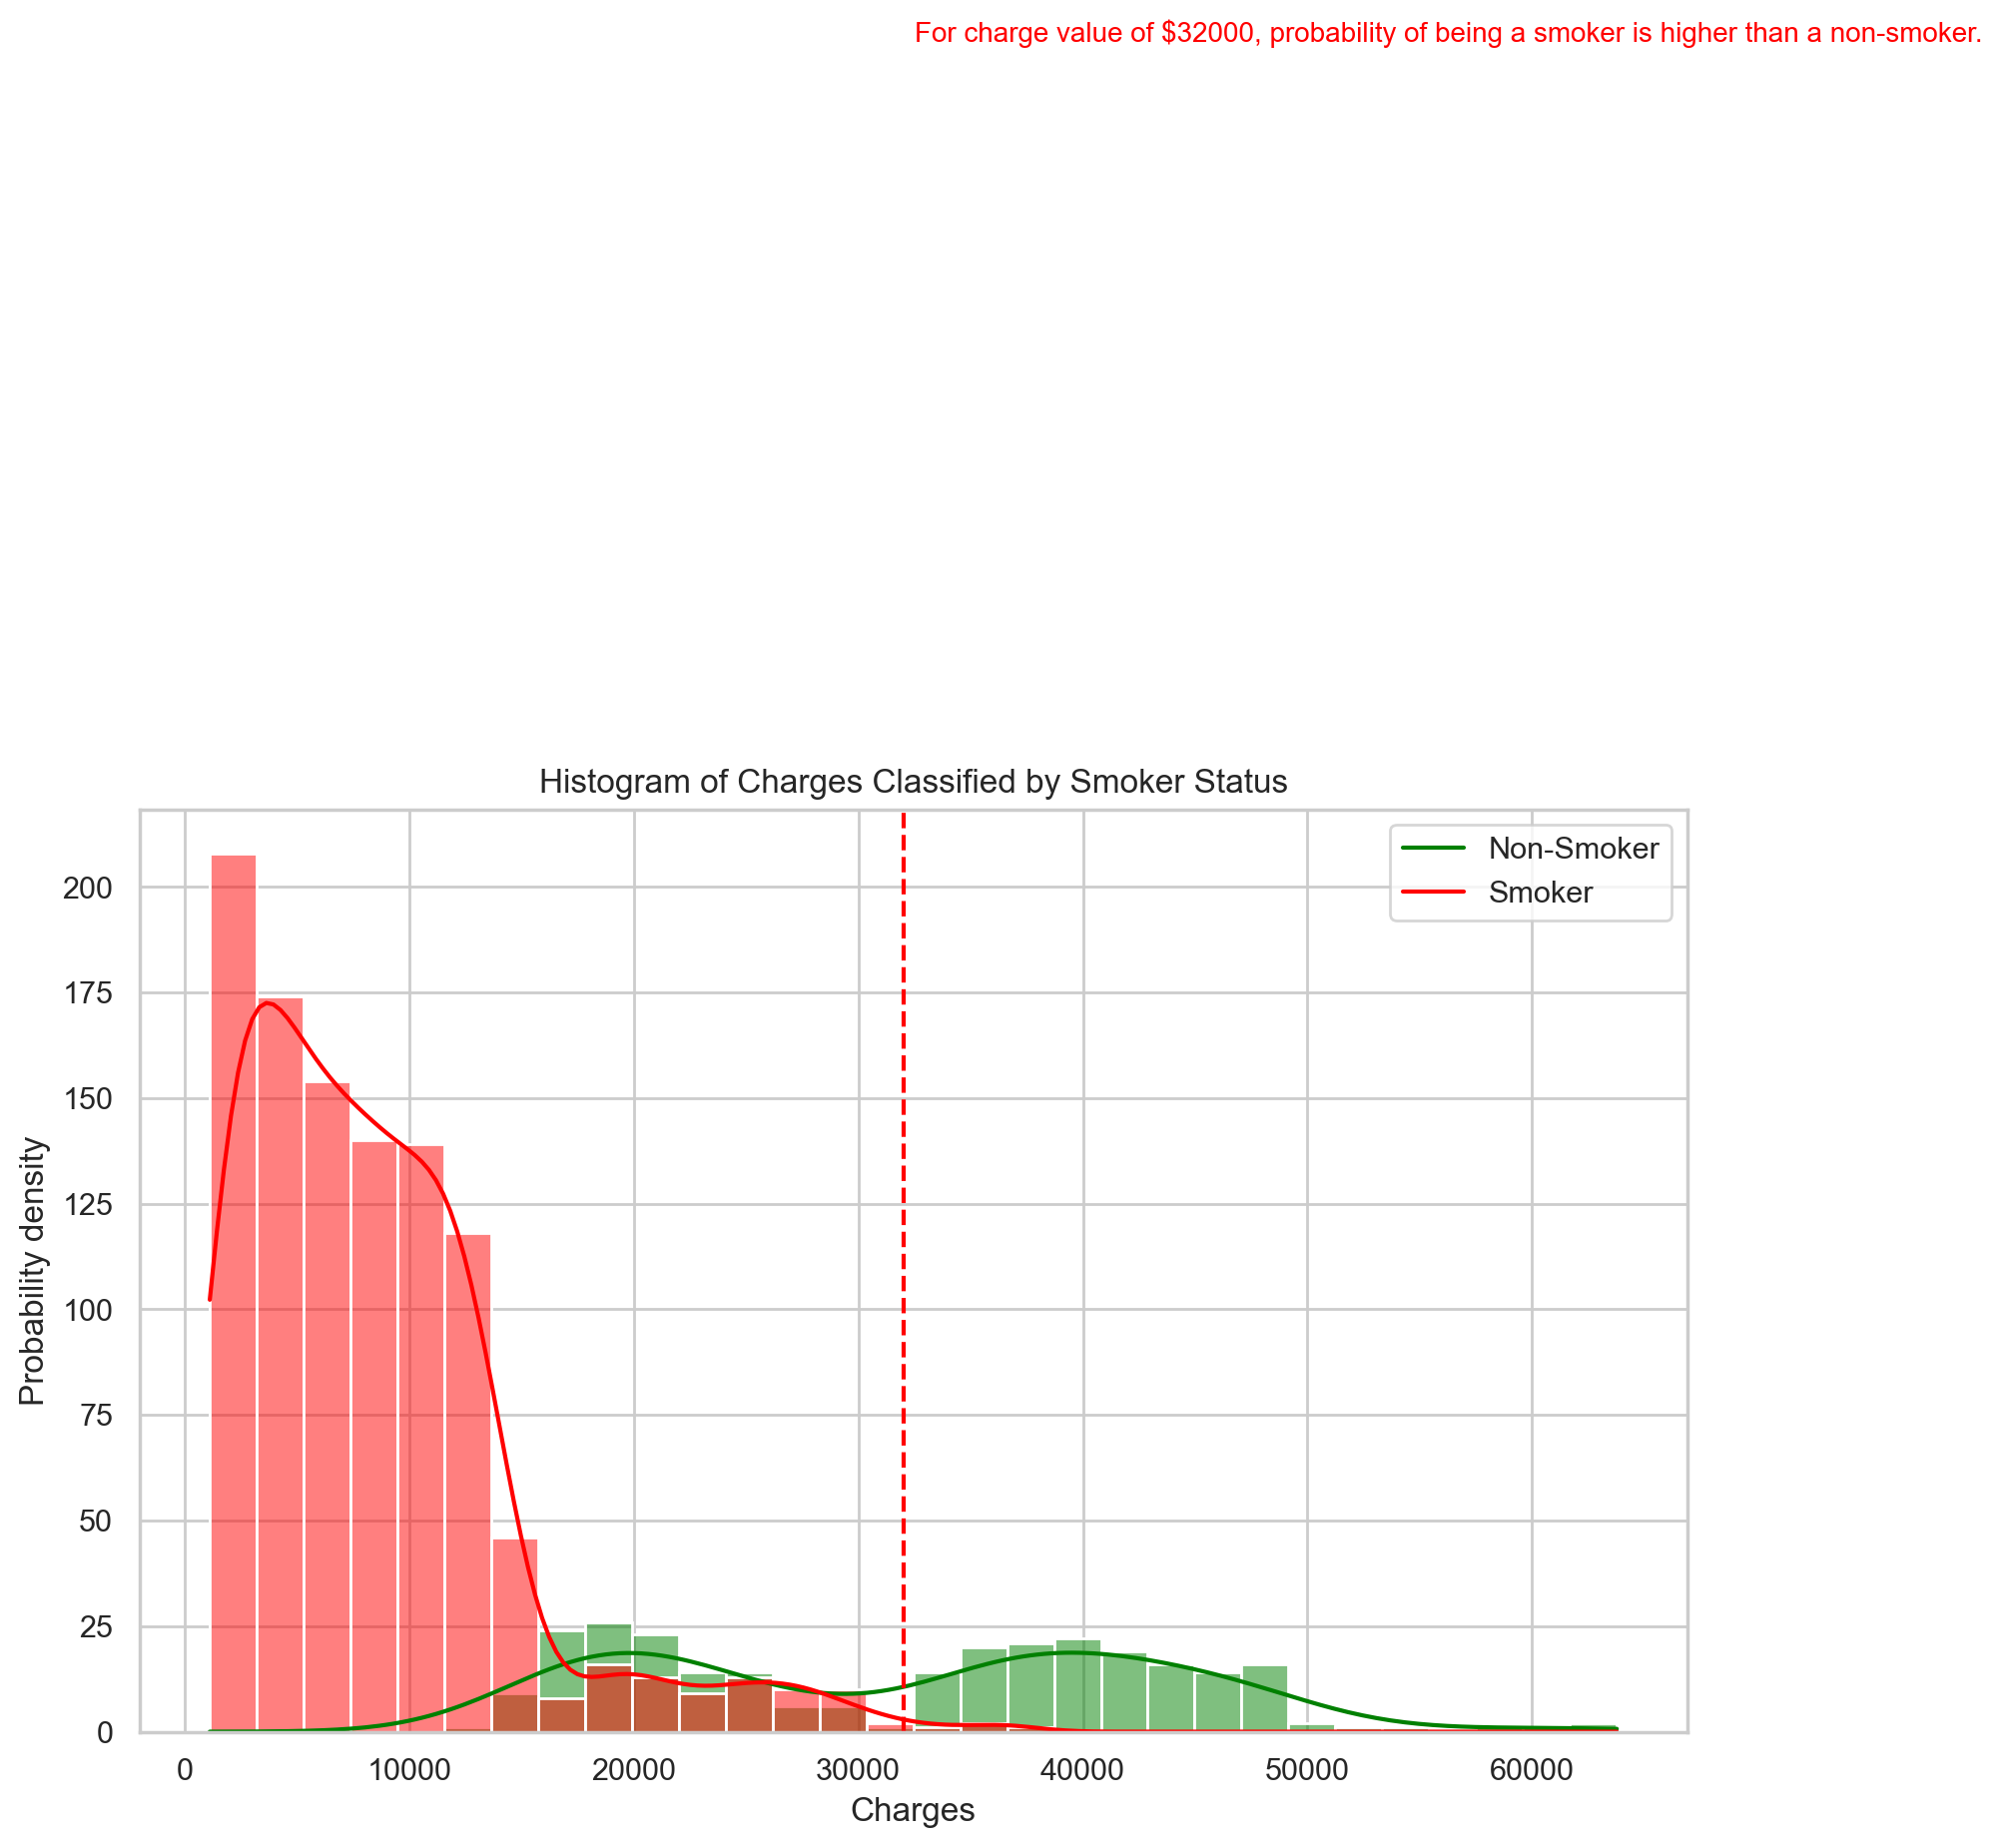

Conclusion:
Based on the analysis, it appears that there are certain charge ranges where the probability of a smoker is higher than a non-smoker. However, charges alone may not be sufficient to reliably predict smoking status. Other factors should be considered for a more accurate prediction.


In [391]:
# Ploting histogram with hue for smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='smoker', bins=30, kde=True, palette={0: 'red', 1: 'green'})
plt.title('Histogram of Charges Classified by Smoker Status')
plt.xlabel('Charges')
plt.ylabel('Probability density')
plt.legend(['Non-Smoker', 'Smoker'])

# Finding areas where probability of smoker is higher than non-smoker for a given charge
# For simplicity, let's consider a single charge value (e.g., 32000)
charge_value = 32000
prob_smoker = len(df[(df['charges'] >= charge_value) & (df['smoker'] == 1)]) / len(df[df['charges'] >= charge_value])
prob_non_smoker = len(df[(df['charges'] >= charge_value) & (df['smoker'] == 0)]) / len(df[df['charges'] >= charge_value])

# Checking if probability of smoker is higher than non-smoker
if prob_smoker > prob_non_smoker:
    conclusion = "For charge value of ${}, probability of being a smoker is higher than a non-smoker.".format(charge_value)
else:
    conclusion = "For charge value of ${}, probability of being a non-smoker is higher than a smoker.".format(charge_value)

# Printing conclusion
print(conclusion)

# Showing plot
plt.axvline(x=charge_value, color='red', linestyle='--')
plt.text(charge_value + 500, 400, conclusion, fontsize=10, color='red')
plt.show()
print("""Conclusion:
Based on the analysis, it appears that there are certain charge ranges where the probability of a smoker is higher than a non-smoker. However, charges alone may not be sufficient to reliably predict smoking status. Other factors should be considered for a more accurate prediction.""")


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Repeat the above similar process replacing smoker by sex. Give your insights. 
</pre>
</p>
</span>
</div>

For charge value of $32000, probability of being male is higher than female.


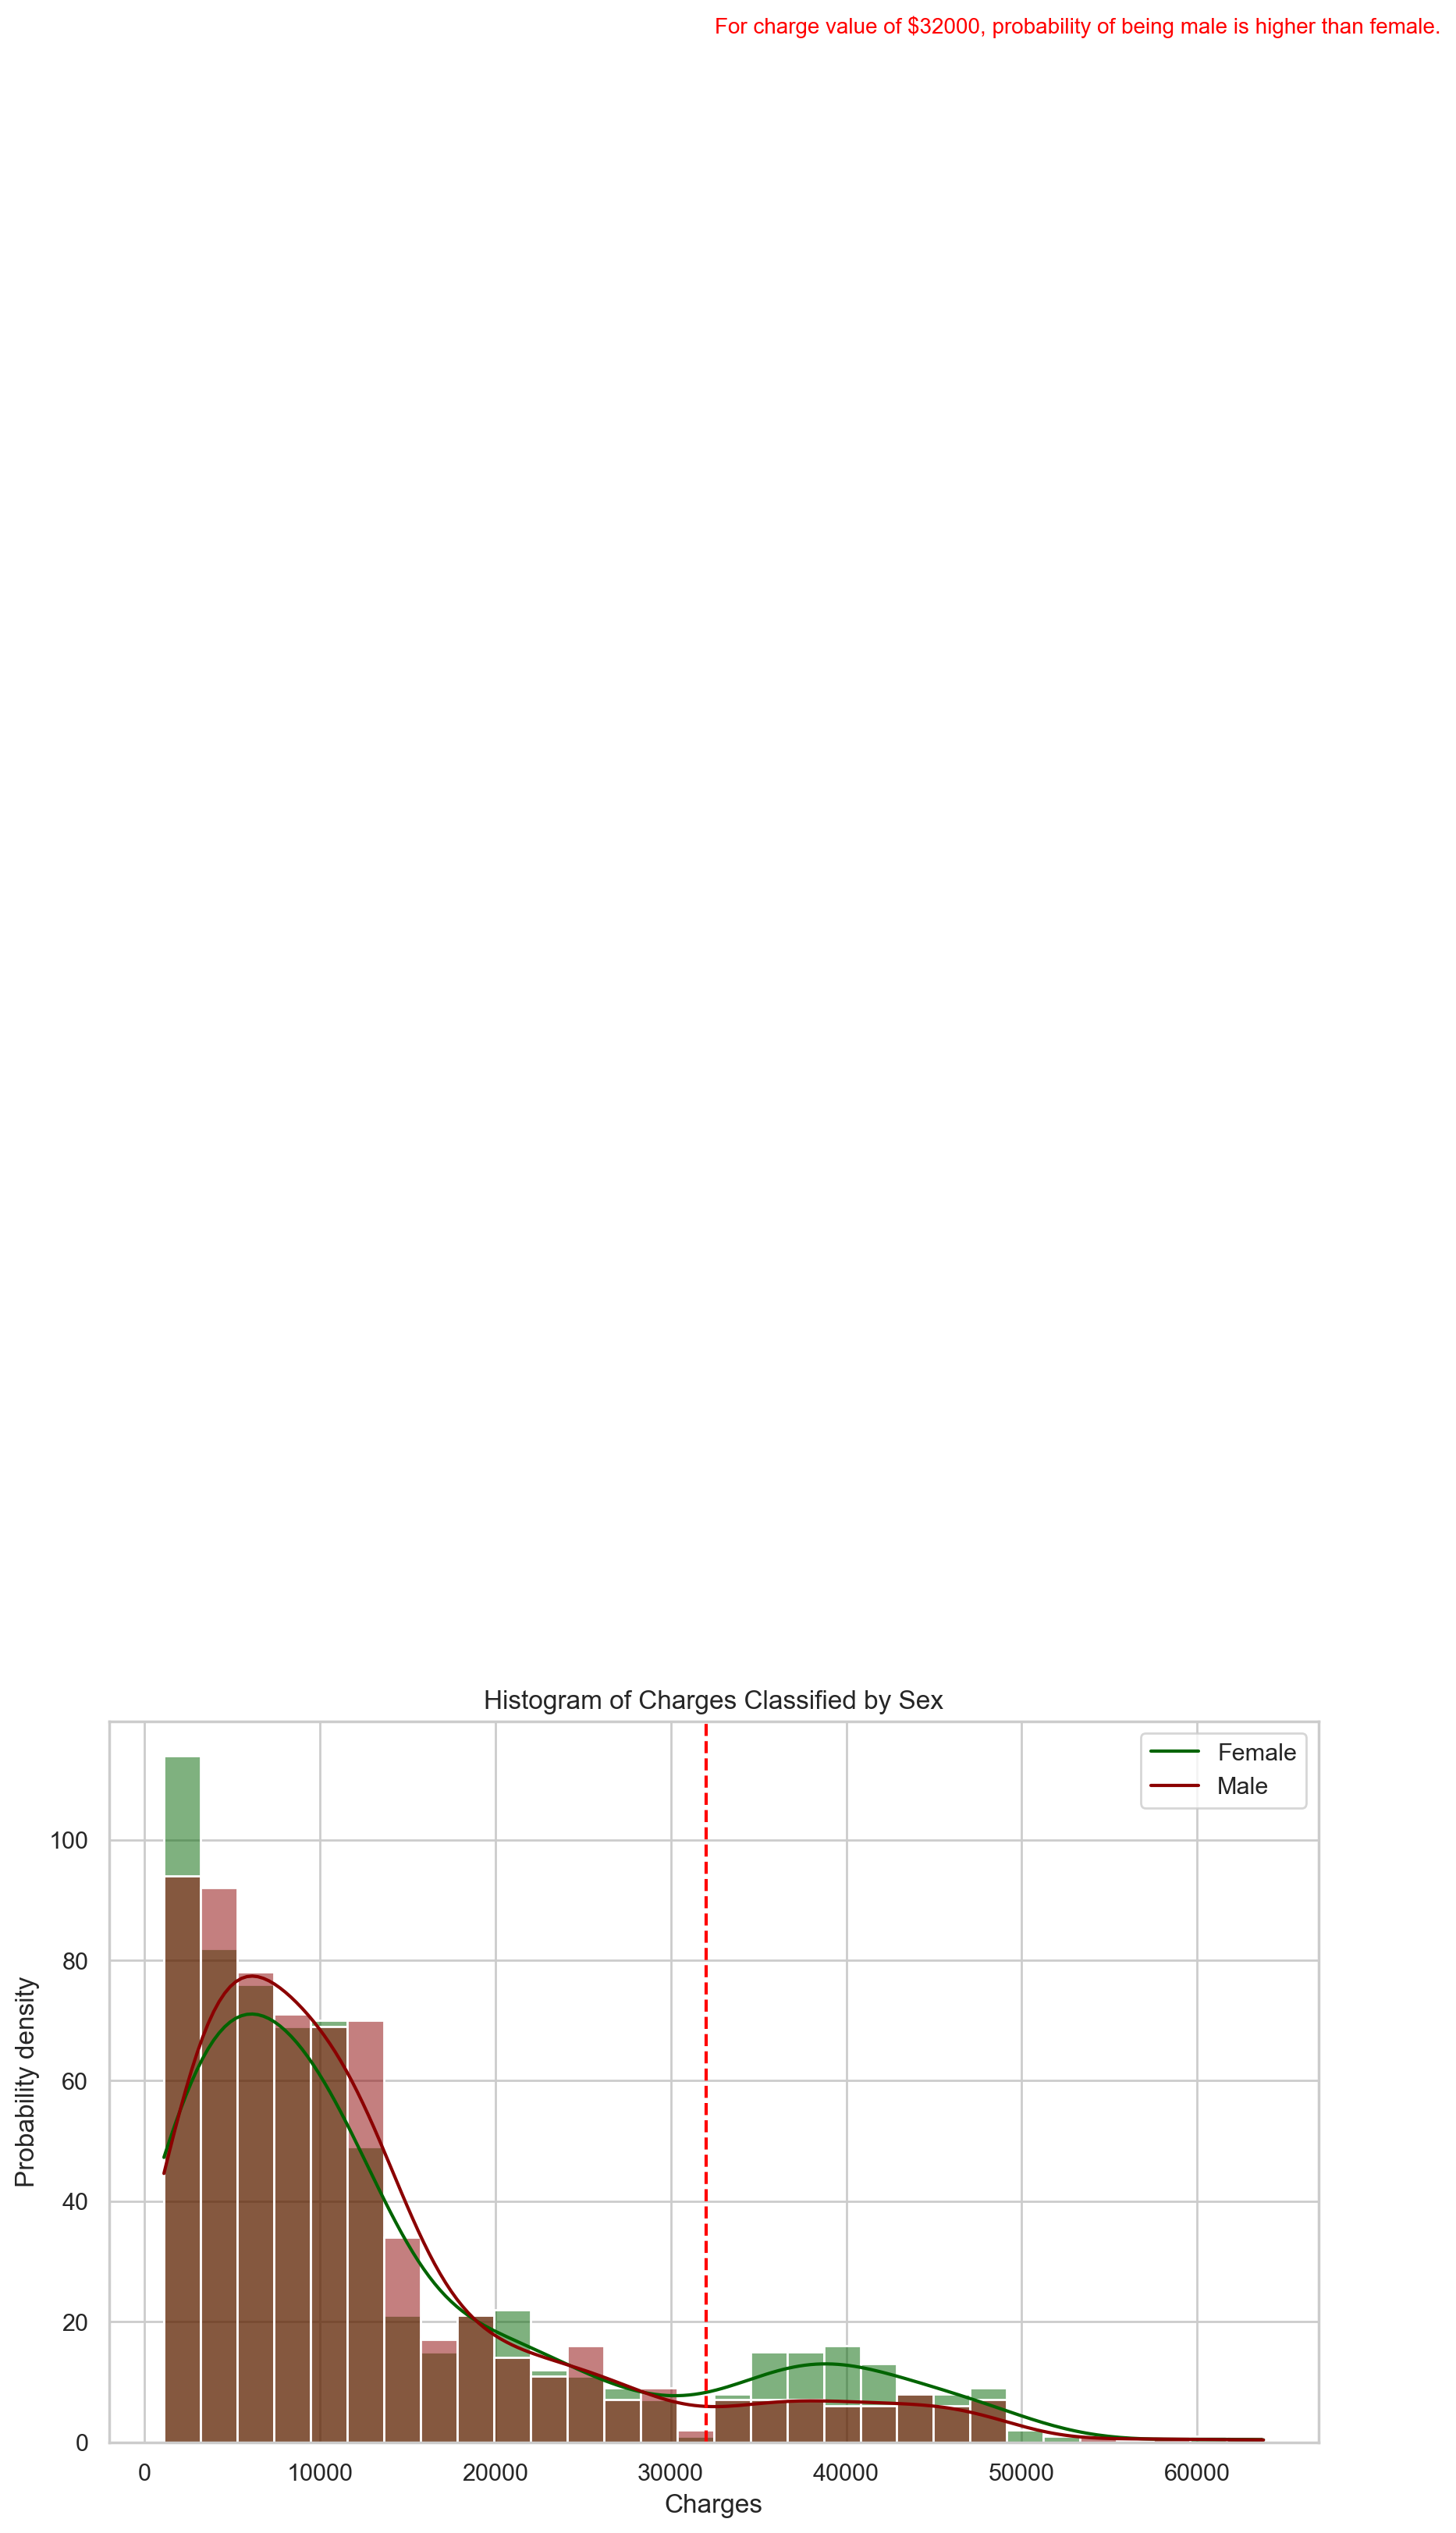

In [392]:
# Ploting histogram with hue for sex (male = 1, female = 0)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='sex', bins=30, kde=True, palette={0: 'darkred', 1: 'darkgreen'})
plt.title('Histogram of Charges Classified by Sex')
plt.xlabel('Charges')
plt.ylabel('Probability density')
plt.legend(['Female', 'Male'])

# Finding areas where probability of male is higher than female for a given charge
# For simplicity, let's consider a single charge value (e.g., 32000)
charge_value = 32000
prob_male = len(df[(df['charges'] >= charge_value) & (df['sex'] == 1)]) / len(df[df['charges'] >= charge_value])
prob_female = len(df[(df['charges'] >= charge_value) & (df['sex'] == 0)]) / len(df[df['charges'] >= charge_value])

# Checking if probability of male is higher than female
if prob_male > prob_female:
    conclusion = "For charge value of ${}, probability of being male is higher than female.".format(charge_value)
else:
    conclusion = "For charge value of ${}, probability of being female is higher than male.".format(charge_value)

# Printing conclusion
print(conclusion)

# Showing plot
plt.axvline(x=charge_value, color='red', linestyle='--')
plt.text(charge_value + 500, 400, conclusion, fontsize=10, color='red')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Calculate correlation using corr() function and plot a heatmap for the correlation and use palette = 'viridis'
</pre>
</p>
</span>
</div>

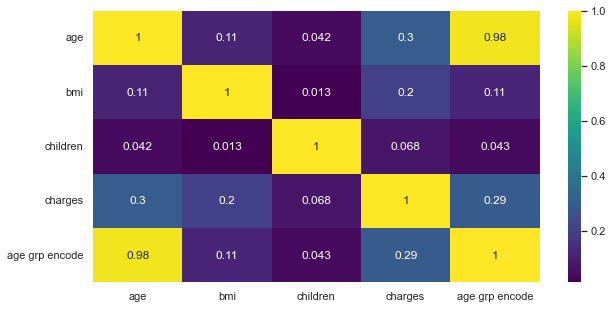

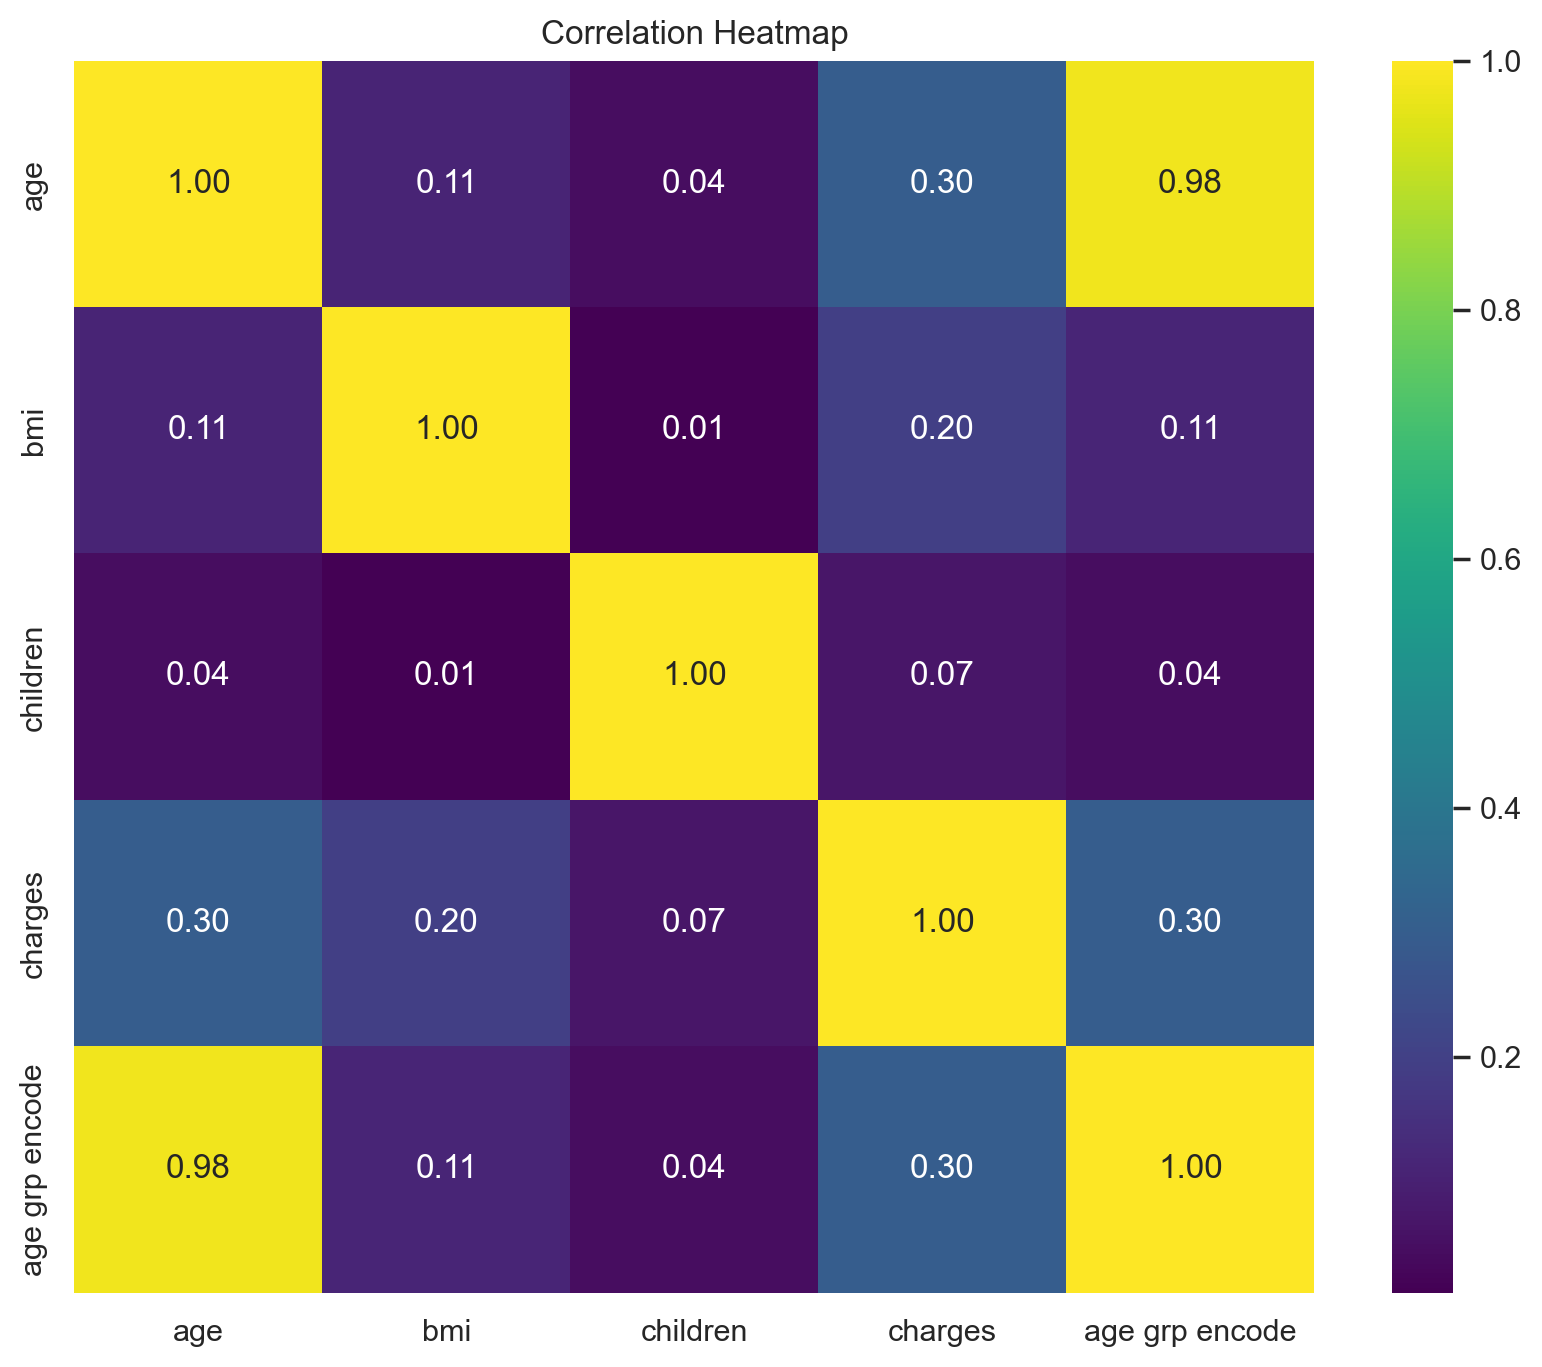

In [393]:
# Selecting the columns for which you want to calculate correlation
selected_columns = ['age', 'bmi', 'children', 'charges', 'age grp encode']

# Calculating the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Ploting heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- A family is requesting you to estimate the price for the insurance given: 
    condition-1: There are 4 people in family, They are no smokers in the family.
    condition-2: They have 2 children with them aged 14 and 17
    condition-3: Four people in the family, Father aged 42 and mother aged 40. 
    Based on the information above, Show them the data that is approximately similar (needn't be exact) to this family. 
    Collectively, what can be the insurance price collectively to be paid by the family? 
</pre>
</p>
</span>
</div>

In [394]:
# Filtering the dataset based on the conditions provided
filtered_data = df[(df['children'] == 2) &
                   (df['smoker'] == 0) &
                   (df['age'].isin([14, 17, 42, 40]))]

# Calculating the average insurance price collectively
average_insurance_price = filtered_data['charges'].mean()

# Displaying the filtered data and average insurance price
print("Filtered Data:")
print(filtered_data)
print("\nAverage Insurance Price Collectively: ${:.2f}".format(average_insurance_price))

Filtered Data:
      age  sex  bmi  children  smoker     charges  region_encoded age group  \
367    42    0   24         2       0  8017.06115               2     40-50   
596    42    0   29         2       0  7640.30920               1     40-50   
633    40    1   22         2       0  7173.35995               3     40-50   
686    42    1   26         2       0  7729.64575               3     40-50   
776    40    1   32         2       0  6986.69700               2     40-50   
835    42    1   35         2       0  7160.33030               1     40-50   
865    40    1   29         2       0  6600.36100               0     40-50   
946    42    1   35         2       0  7160.09400               0     40-50   
1221   40    1   24         2       0  6593.50830               1     40-50   
1227   42    1   37         2       0  7162.01220               1     40-50   

      age grp encode       BMI group  BMI group encoded  
367                3  Healthy weight                  0  

In [395]:
df.head()

,age,sex,bmi,children,smoker,charges,region_encoded,age group,age grp encode,BMI group,BMI group encoded
0,19,0,27,0,1,16884.92400,0,10-20,0,Overweight,2
1,18,1,33,1,0,1725.55230,1,10-20,0,Obese,1
2,28,1,33,3,0,4449.46200,1,20-30,1,Obese,1
3,33,1,22,0,0,21984.47061,2,30-40,2,Healthy weight,0
4,32,1,28,0,0,3866.85520,2,30-40,2,Overweight,2


# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-II </p> </span> </div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to build a model for prediction. Before that, Encode all the categorical features to train the model. 
Hints: Use pandas.replace() or pandas.map() to encode the variables
You can also use LabelEncoder to label the data. 
You can also pandas.get_dummies() to segregate the categorical data. 
</pre>
</p>
</span>
</div>

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                1338 non-null   int64   
 1   sex                1338 non-null   int64   
 2   bmi                1338 non-null   int32   
 3   children           1338 non-null   int64   
 4   smoker             1338 non-null   int64   
 5   charges            1338 non-null   float64 
 6   region_encoded     1338 non-null   int64   
 7   age group          1316 non-null   category
 8   age grp encode     1338 non-null   int32   
 9   BMI group          1338 non-null   category
 10  BMI group encoded  1338 non-null   int32   
dtypes: category(2), float64(1), int32(3), int64(5)
memory usage: 81.7 KB


In [397]:
df['BMI group'].unique()

['Overweight', 'Obese', 'Healthy weight', 'Severely Obese', 'Under weight']
Categories (5, object): ['Under weight' < 'Healthy weight' < 'Overweight' < 'Obese' < 'Severely Obese']

In [398]:
df['age group'].value_counts()

age group
20-30           280
40-50           279
50-60           271
30-40           257
10-20           137
>60              92
Less than 10      0
Name: count, dtype: int64

In [399]:
df.head()

,age,sex,bmi,children,smoker,charges,region_encoded,age group,age grp encode,BMI group,BMI group encoded
0,19,0,27,0,1,16884.92400,0,10-20,0,Overweight,2
1,18,1,33,1,0,1725.55230,1,10-20,0,Obese,1
2,28,1,33,3,0,4449.46200,1,20-30,1,Obese,1
3,33,1,22,0,0,21984.47061,2,30-40,2,Healthy weight,0
4,32,1,28,0,0,3866.85520,2,30-40,2,Overweight,2


In [400]:
df['age group'].map({'Less than 10' :0,'10-20':1,'20-30':2,'30-40':3,'40-50':4,'50-60':5,})

0       1.0
1       1.0
2       2.0
3       3.0
4       3.0
       ... 
1333    5.0
1334    1.0
1335    1.0
1336    2.0
1337    NaN
Name: age group, Length: 1338, dtype: float64

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to scale the numerical features. 
You can use any scalers. Standard Scaler, Minmax scaler, Robust Scaler. Mention the reasons. 
</pre>
</p>
</span>
</div>

In [401]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Why do you think we need to scale the features? 
</pre>
</p>
</span>
</div>

In [402]:
print("""Scaling features is essential in this insurance prediction project to ensure that all numerical features contribute equally to the model's training process.
Since features like age, BMI, and charges have different scales and units,
scaling them helps prevent certain features from dominating the learning process simply because they have larger magnitudes. 
      This ensures that the model learns meaningful patterns from all features and improves its predictive performance.""")

Scaling features is essential in this insurance prediction project to ensure that all numerical features contribute equally to the model's training process.
Since features like age, BMI, and charges have different scales and units,
scaling them helps prevent certain features from dominating the learning process simply because they have larger magnitudes. 
      This ensures that the model learns meaningful patterns from all features and improves its predictive performance.


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Remove unnecessary features. 
</pre>
</p>
</span>
</div>

In [403]:
df.drop(['age group','age grp encode','BMI group','BMI group encoded'],axis=1,inplace=True)

In [404]:
df.head()

,age,sex,bmi,children,smoker,charges,region_encoded
0,19,0,27,0,1,16884.92400,0
1,18,1,33,1,0,1725.55230,1
2,28,1,33,3,0,4449.46200,1
3,33,1,22,0,0,21984.47061,2
4,32,1,28,0,0,3866.85520,2


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Now, the data is cleaned and preprocessed. Lets build the model using Linear Regression
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Split the data into train data and test data using train_test_split() in the ratio 4:1
</pre>
</p>
</span>
</div>

In [405]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [406]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [407]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [408]:
x_train.shape

(1070, 6)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform the Linear Regression for the whole data to create a summary and understand the assumptions. Follow the steps and run the below cells. 
- Run the below cell. You need not right any code in the cells that mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [409]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [410]:
reg.coef_

array([3577.10643431,  -12.51091037, 2033.6169406 ,  542.06089962,
       9513.64330628,  323.65061097])

In [411]:
reg.intercept_

13201.182056009347

In [412]:
reg.score(x, y)

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-301.37520230085875

In [413]:
reg_pred=reg.predict(x_test)

##  <mark><span  style= "font-family: Times New Roman">Assumptions: </span> </mark> <a class="anchor" id="Assumptions"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumptions for Linear Regression:
Lets check the extent upto where the assumptions of Linear Regression is valid:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform Ordinary least squares to understand these assumptions. 
- Run the below cell. You need not right any code in the cells that are mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [414]:
# Run this cell to understand the summary.
import statsmodels.api as sm
X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.0
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:23:10   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.269e+04   1001.286    -12.673      0.000   -1.47e+04   -1.07e+04
age              257.4111     11.885     21.658      0.000     234.095     280.727
sex             -132.2364    332.838     -0.397      0.691    -785.180     520.707
bmi              331.2814     27.633     11.988      0.000     277.072     385.491
children         482.1543    137.652      3.503      0.000     212.115     752.193
smoker          2.383e+04    411.868     57.861      0.000     2.3e+04    2.46e+04
region_encoded   357.7412    151.993      2.354      0.019      59.569     655.914
==============================================================================
Omnibus:                      298.547   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.988
Skew:                           1.206   Prob(JB):                    2.48e-155
Kurtosis:                       5.638   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-1 : No Autocorrelation.
From the above summary, Note the Durbin Watson value.
Durbin-Watson test is a statistical test that works for finding autocorrelation value. It lies generally between 0-4.
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Durbin watson value and Write an if statement to print:
"Positive Correlation" for value greater than 2
"Zero correlation" for value equal to 2
"Negative Correlation" for value lesser than 2
</pre>
</p>
</span>
</div>

C:\Users\vinayakb\AppData\Local\Temp\ipykernel_10740\3201384818.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


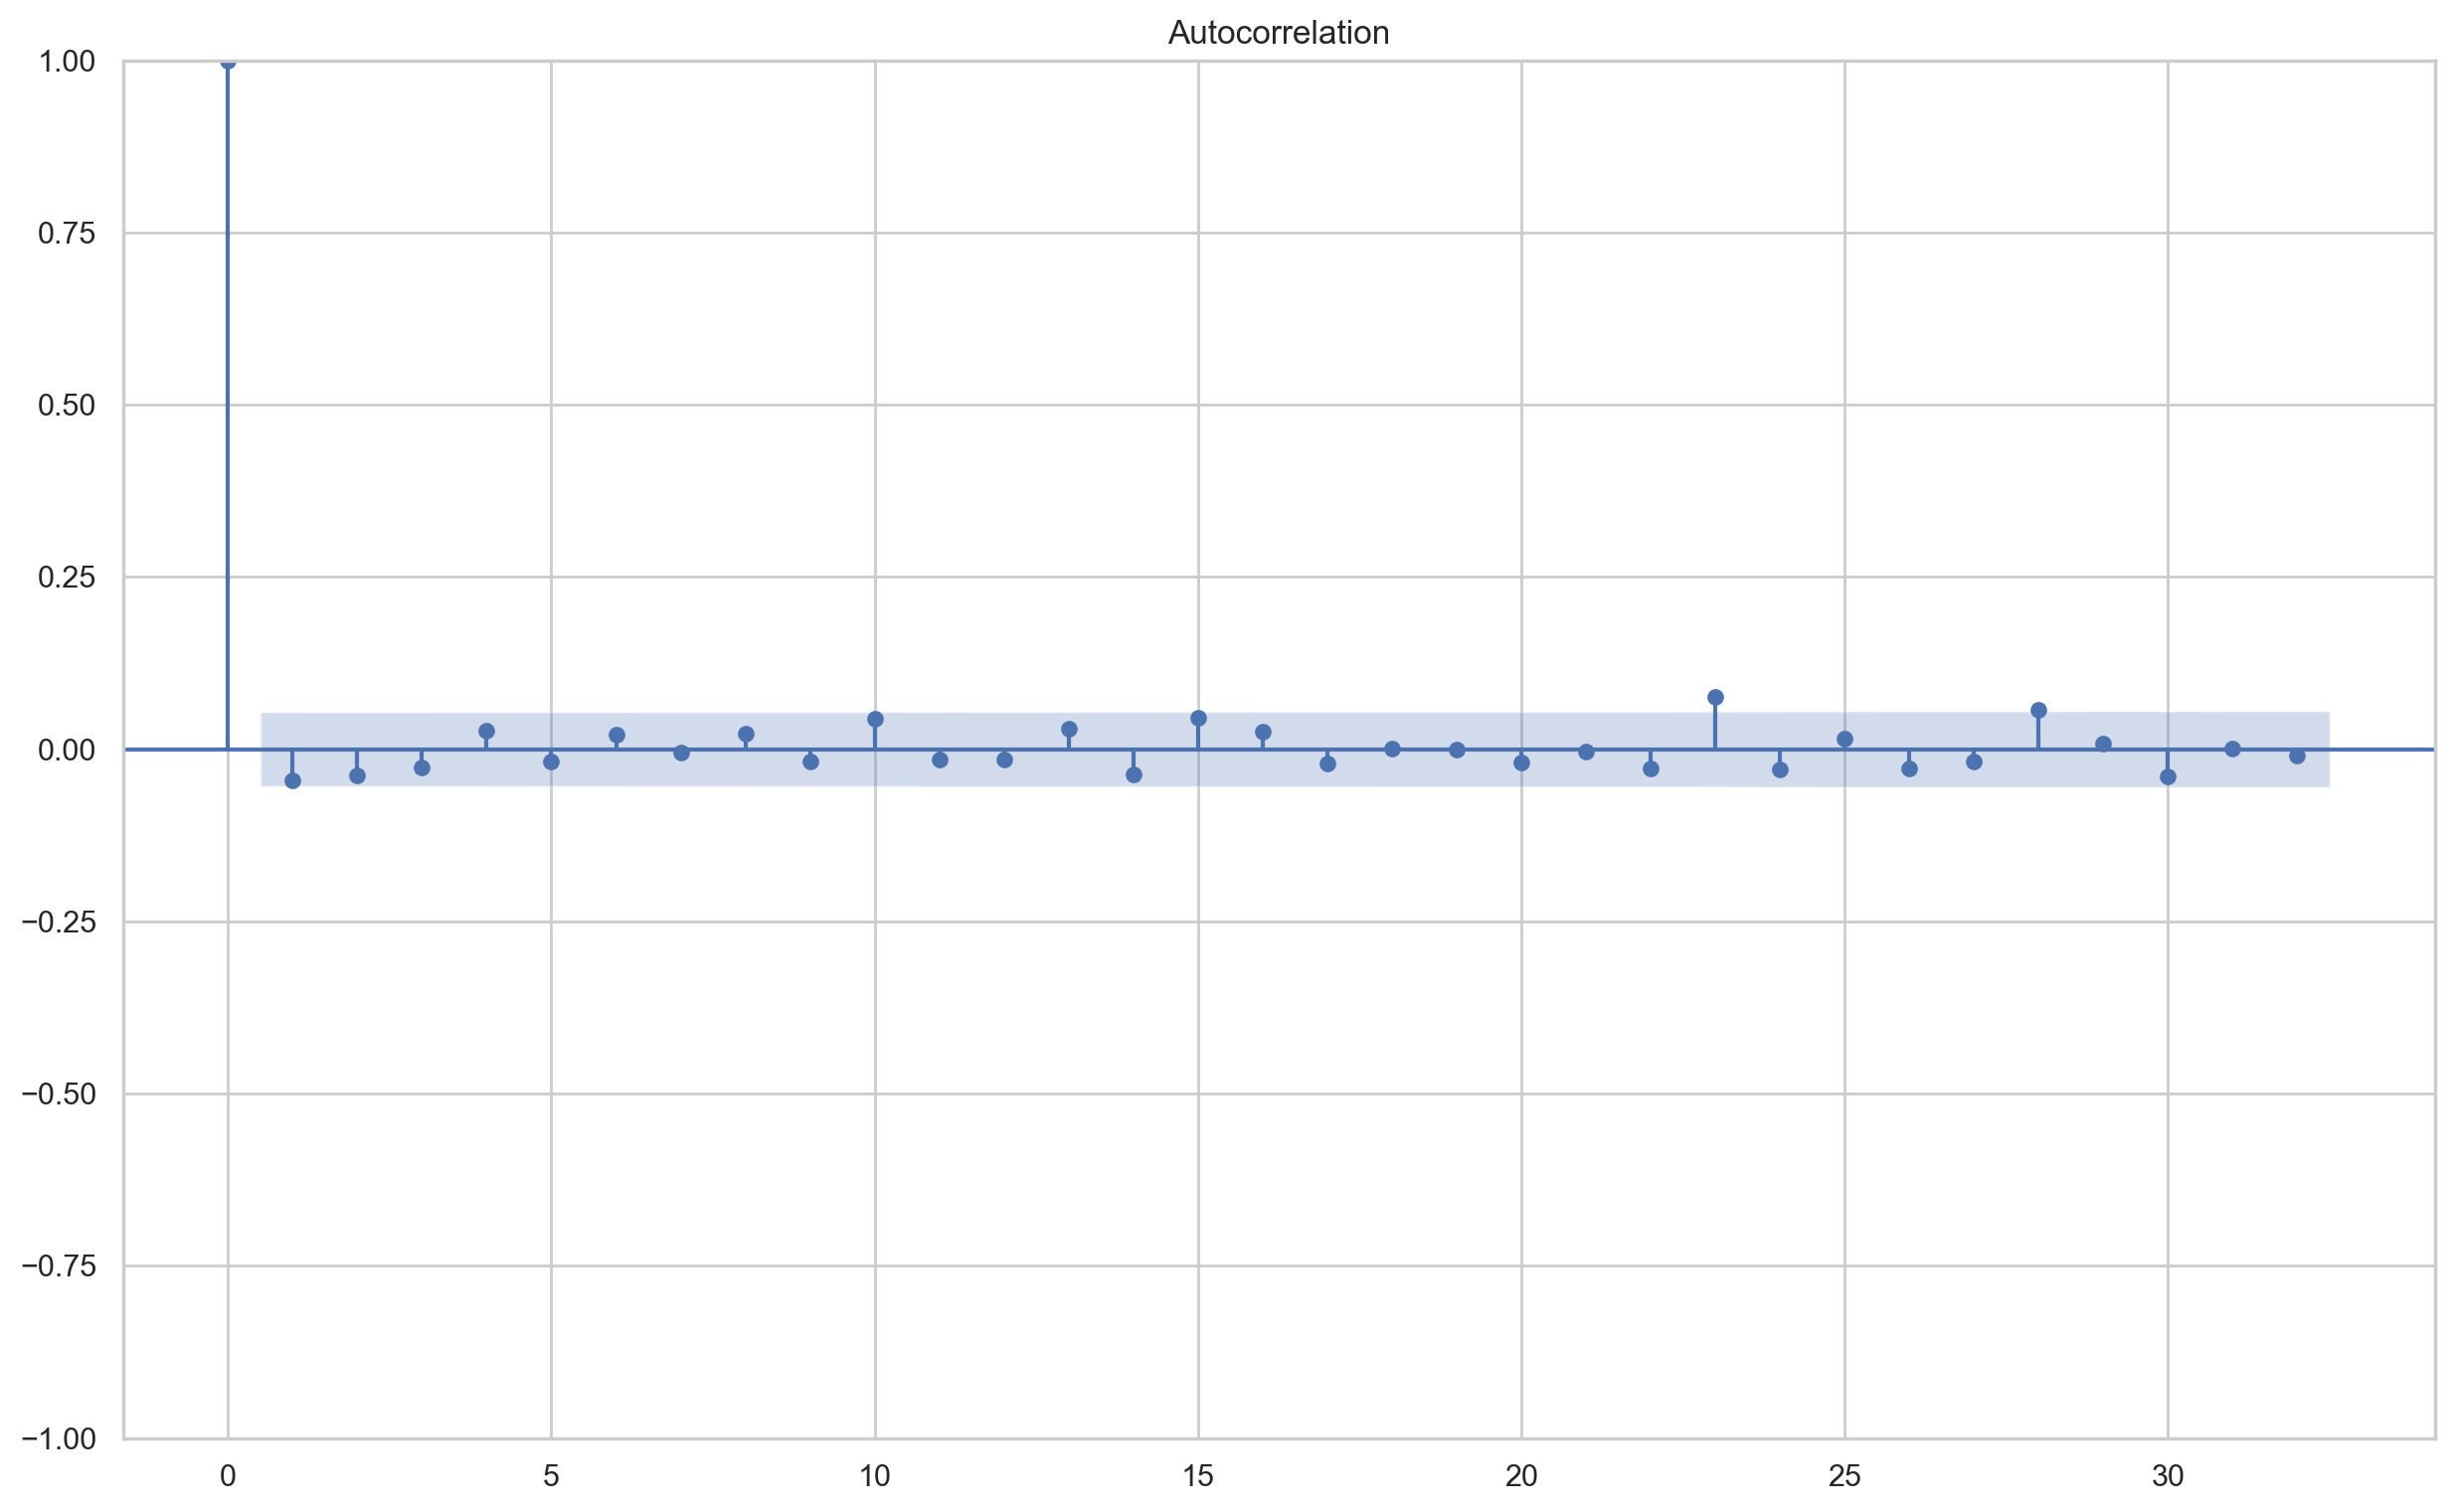

In [415]:
# Run the cell below
# this plot is called autocorrelation plot. you will be working on this later in the course.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid,alpha=0.05)
acf.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-2 : Normality of Residuals.
From the above summary, Note the Jarque bera value.
Normality is an assumption for many statistical tests. Jarque-bera value is a test for checking normality. 
We are performing this here to check the normality for the different of actual and predicted values.
</pre>
</p>
</span>
</div>

In [416]:
# Run the below cell
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=711.9880139379322, pvalue=2.4760943133508657e-155)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Jarque bera value and p-value as 0.05 and Write an if statement to print:
"Normal distribution" for value greater than p-value
"Non-normal distribution" for value lesser than p-value
</pre>
</p>
</span>
</div>

C:\Users\vinayakb\AppData\Local\Temp\ipykernel_10740\1340316266.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lin_reg.resid)


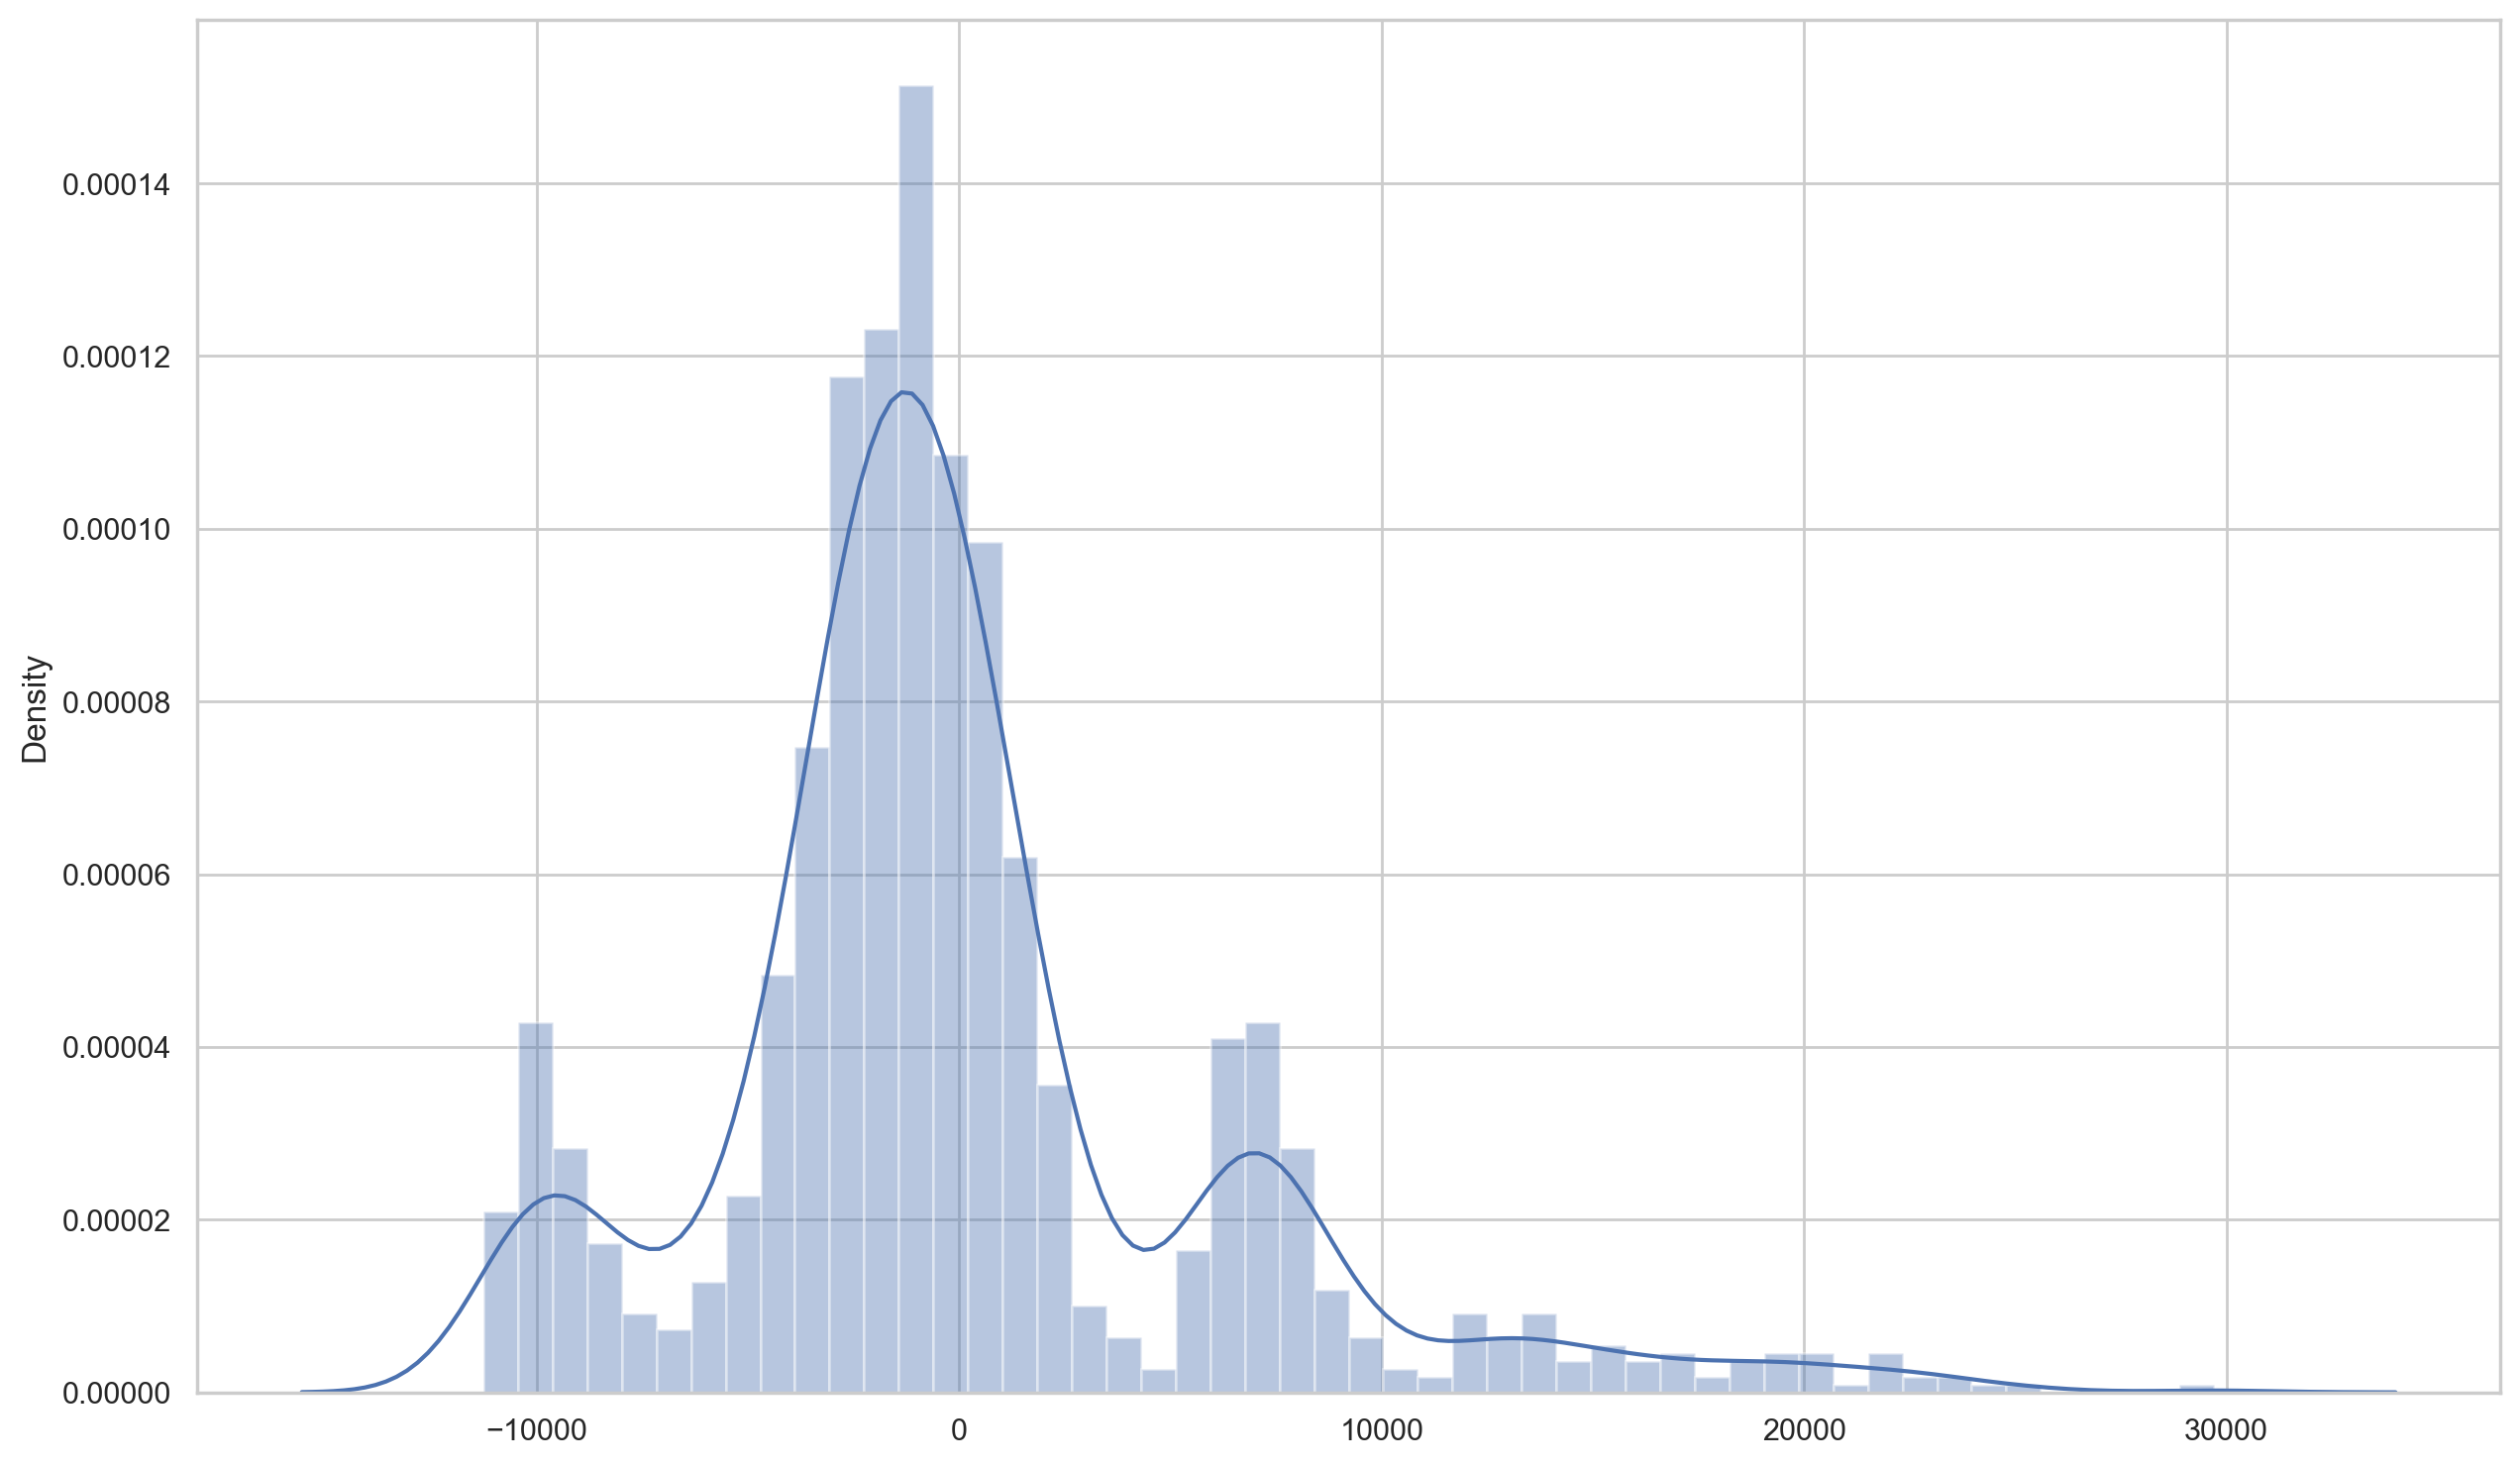

In [417]:
# Validate your above answer by running the cell
import seaborn as sns
sns.distplot(lin_reg.resid)
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Asssumption 3 - Linearity of residuals
Run the below cell to check the Linearity in the model
</pre>
</p>
</span>
</div>

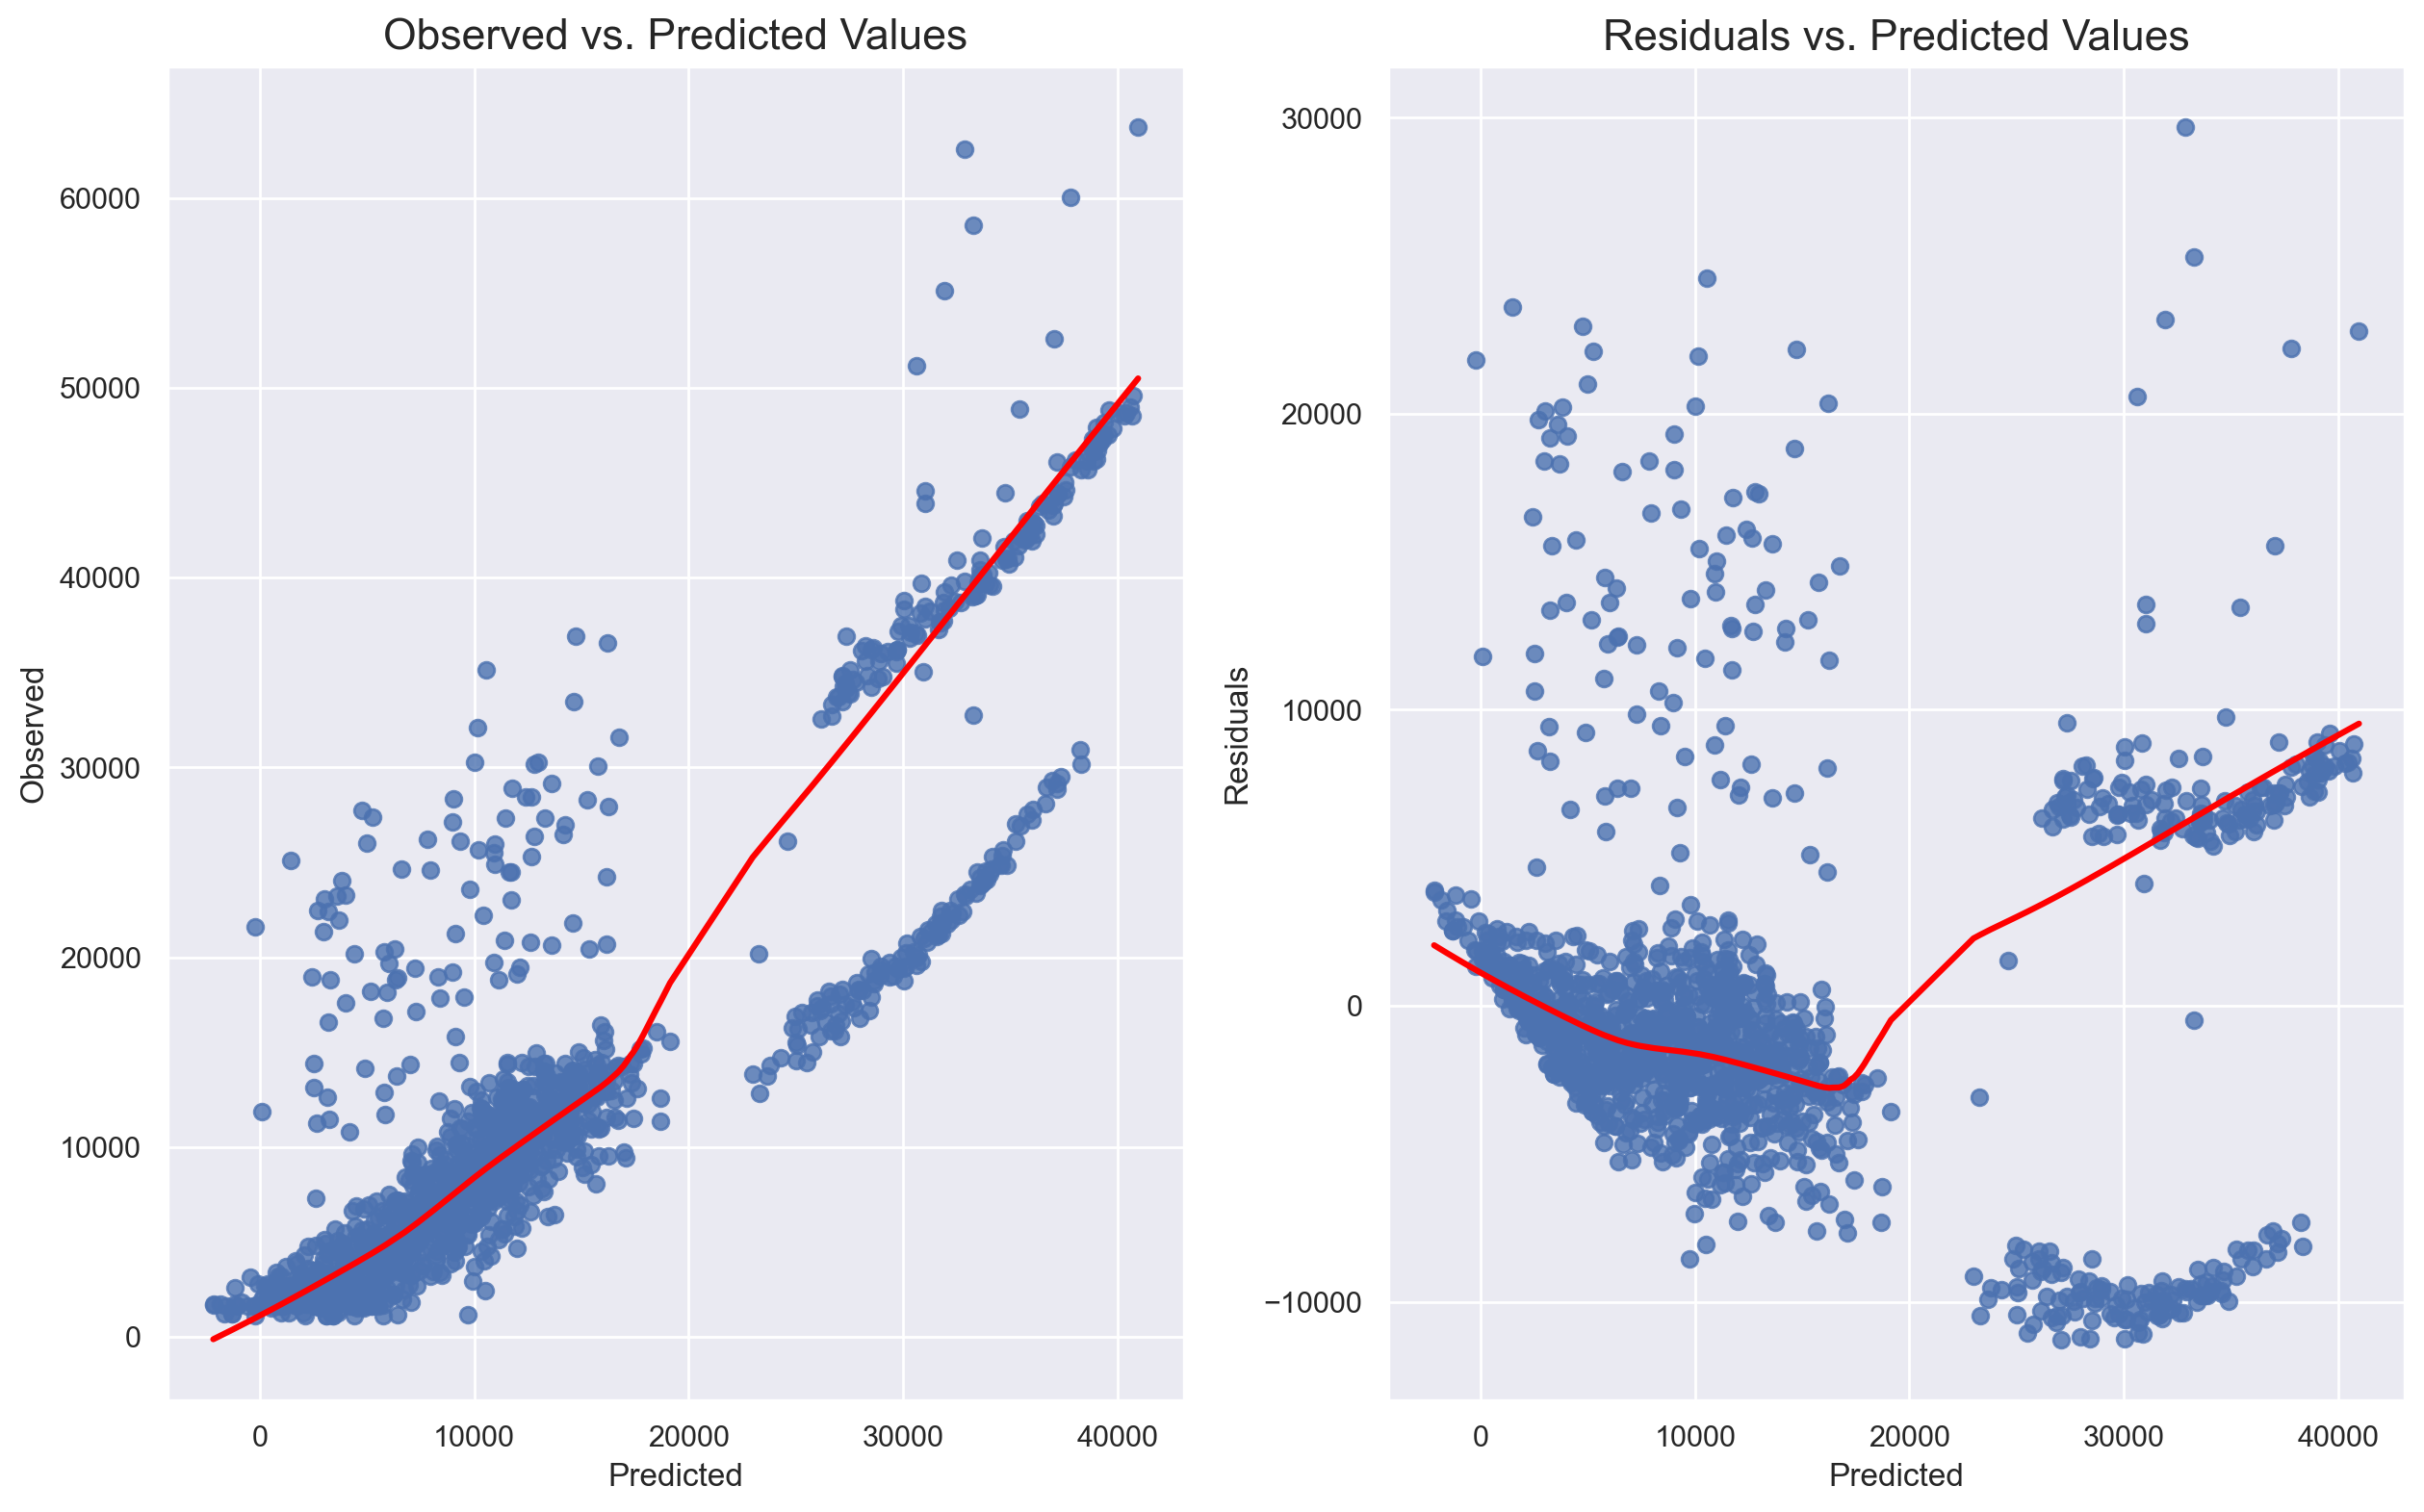

In [418]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

# function to test the linearity. Input the model(Linear Regression and the output)
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    # Finding the predictions from the model
    fit_values = model.predict()
    #Residuals 
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    # Plotting a regression plot for the above found values
    sns.regplot(x=fit_values, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Run the below cell to perform Rainbow test. 
Rainbow test is performed to test linearity. Even though there is no good linearity, it can be used to achieve the linearity from a subsample data.
</pre>
</p>
</span>
</div>

In [419]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.1396195946910814, 0.0460717066040955)

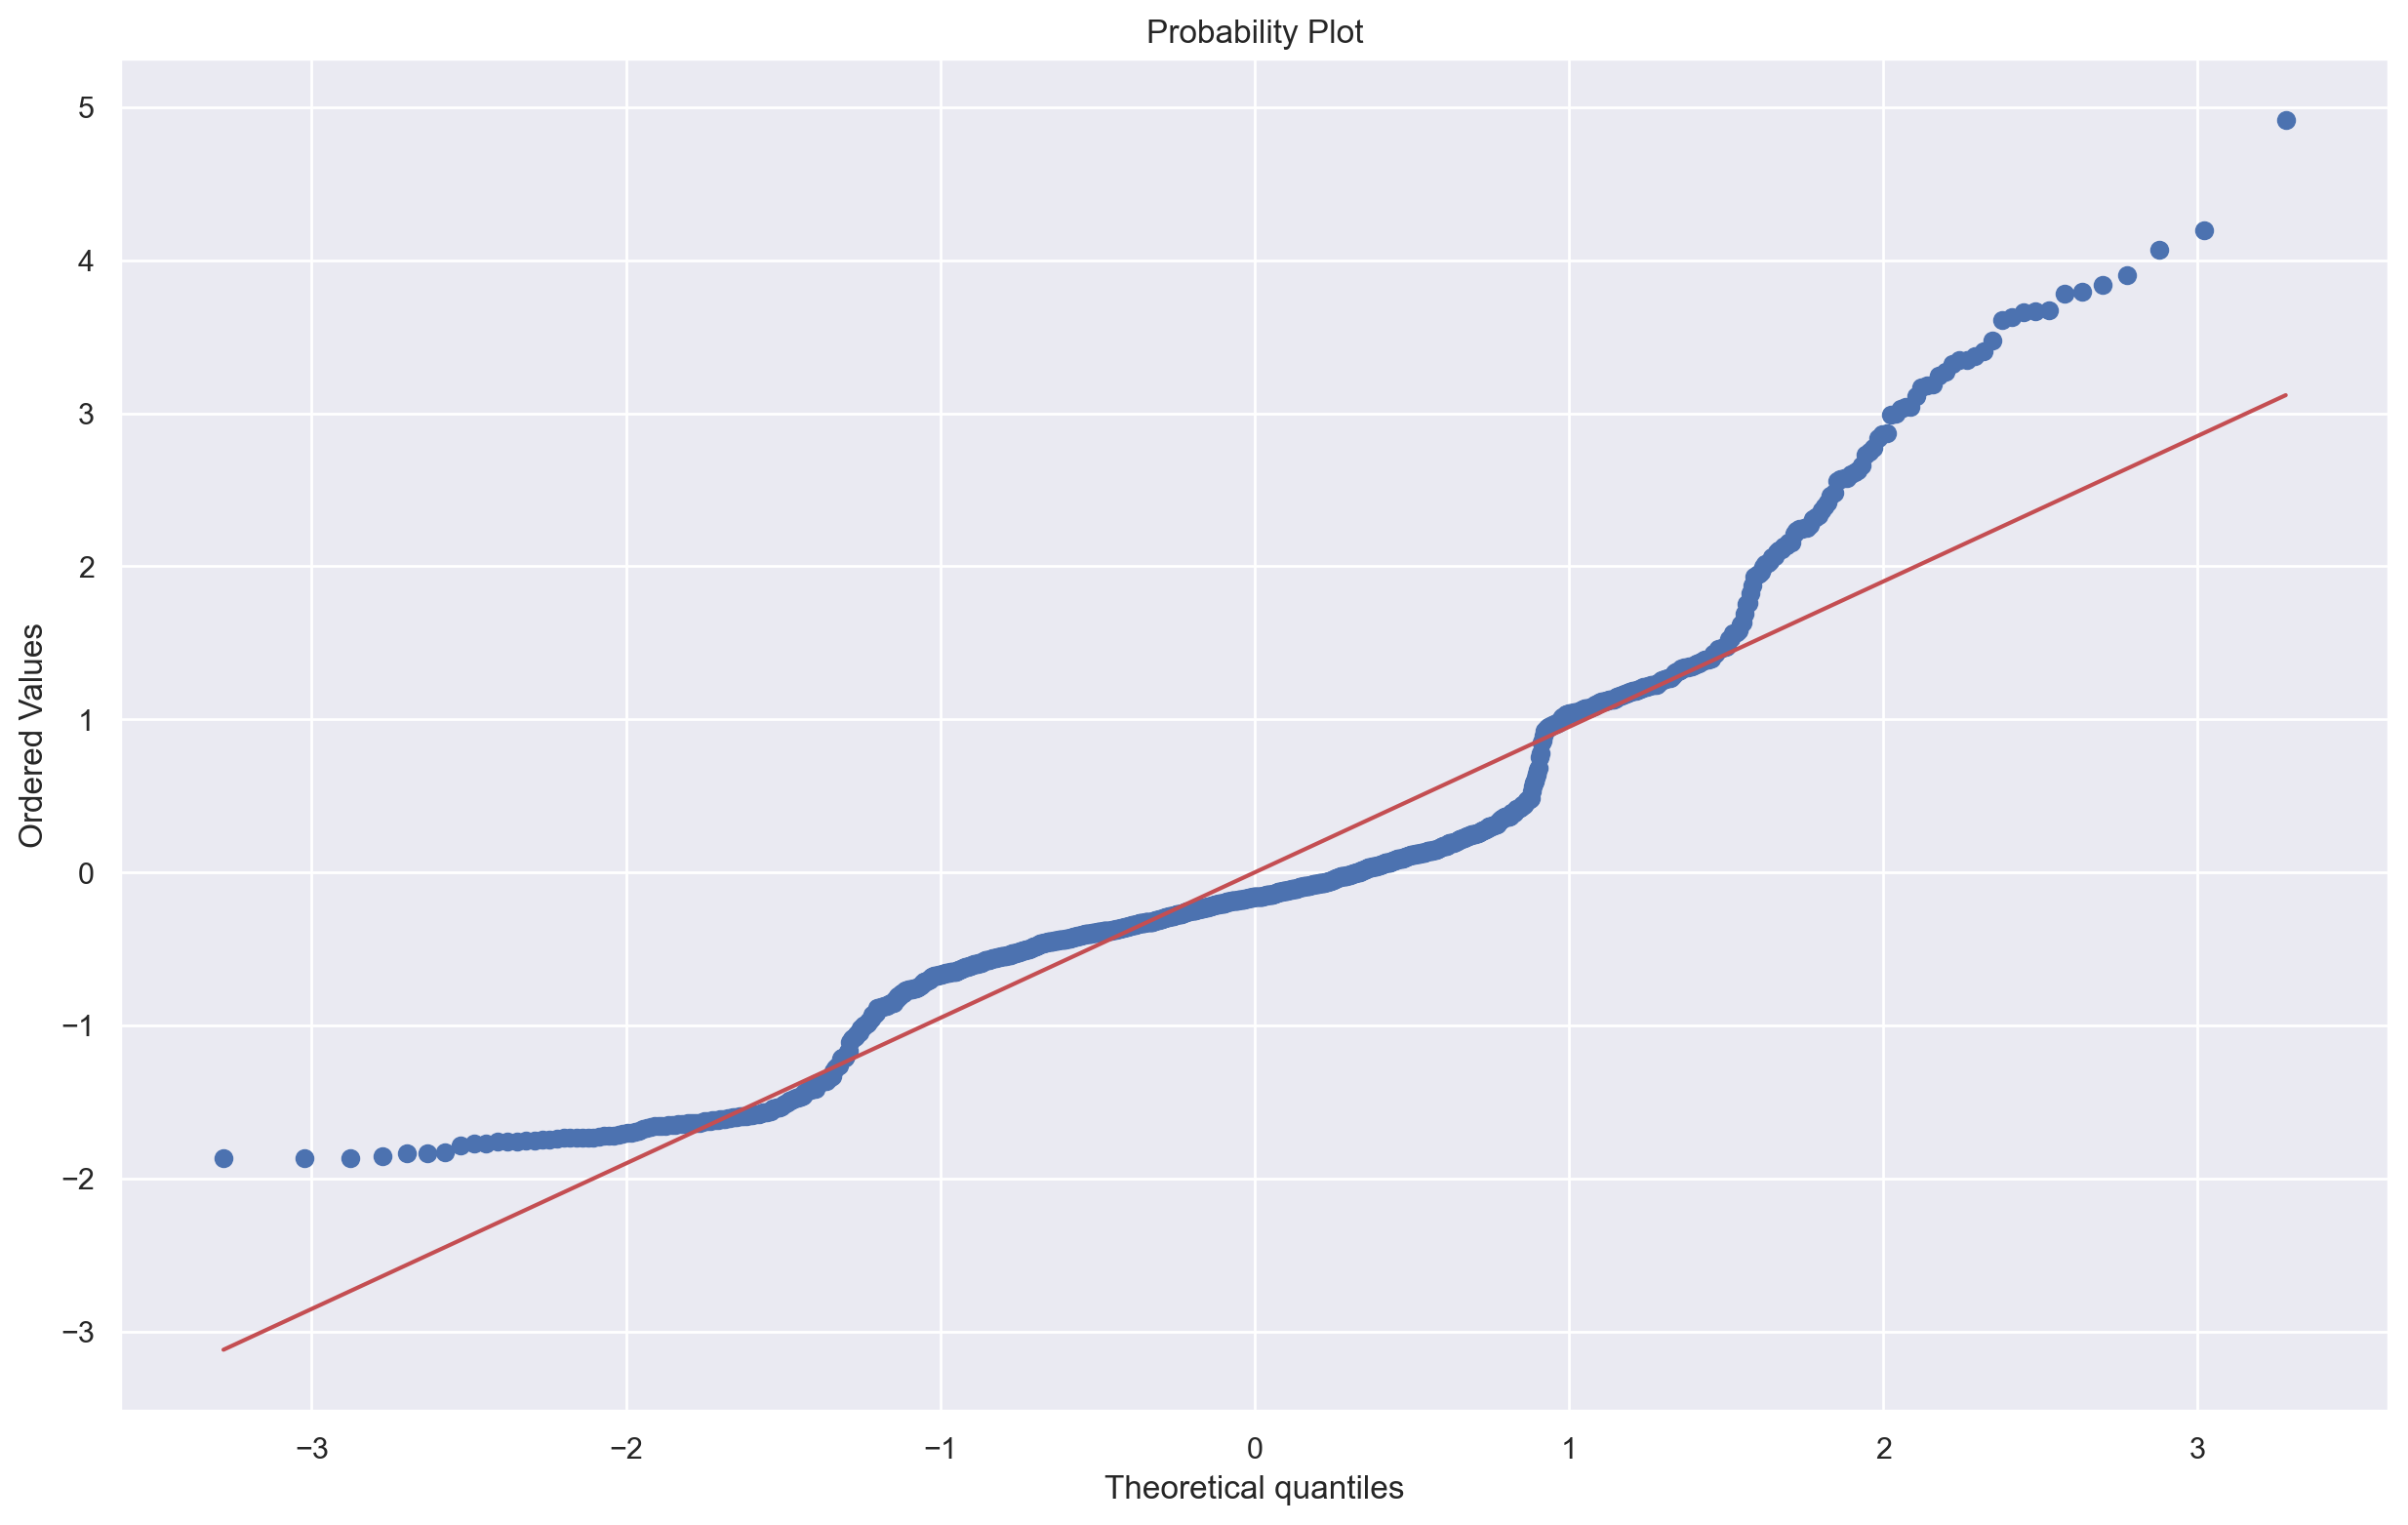

In [420]:
# Run the below cell and understand the residual distribution
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
# We are plotting studentized residuals
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [421]:
lin_reg.resid.mean()
# As the value is very much close it zero .We can say linearity is present.

2.035963027466573e-11

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Run the below cell to check the homoscedasticity in the model
</pre>
</p>
</span>
</div>

**We are plotting the same as above plots, but for checking homoscedasticity (uniform variance)**

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

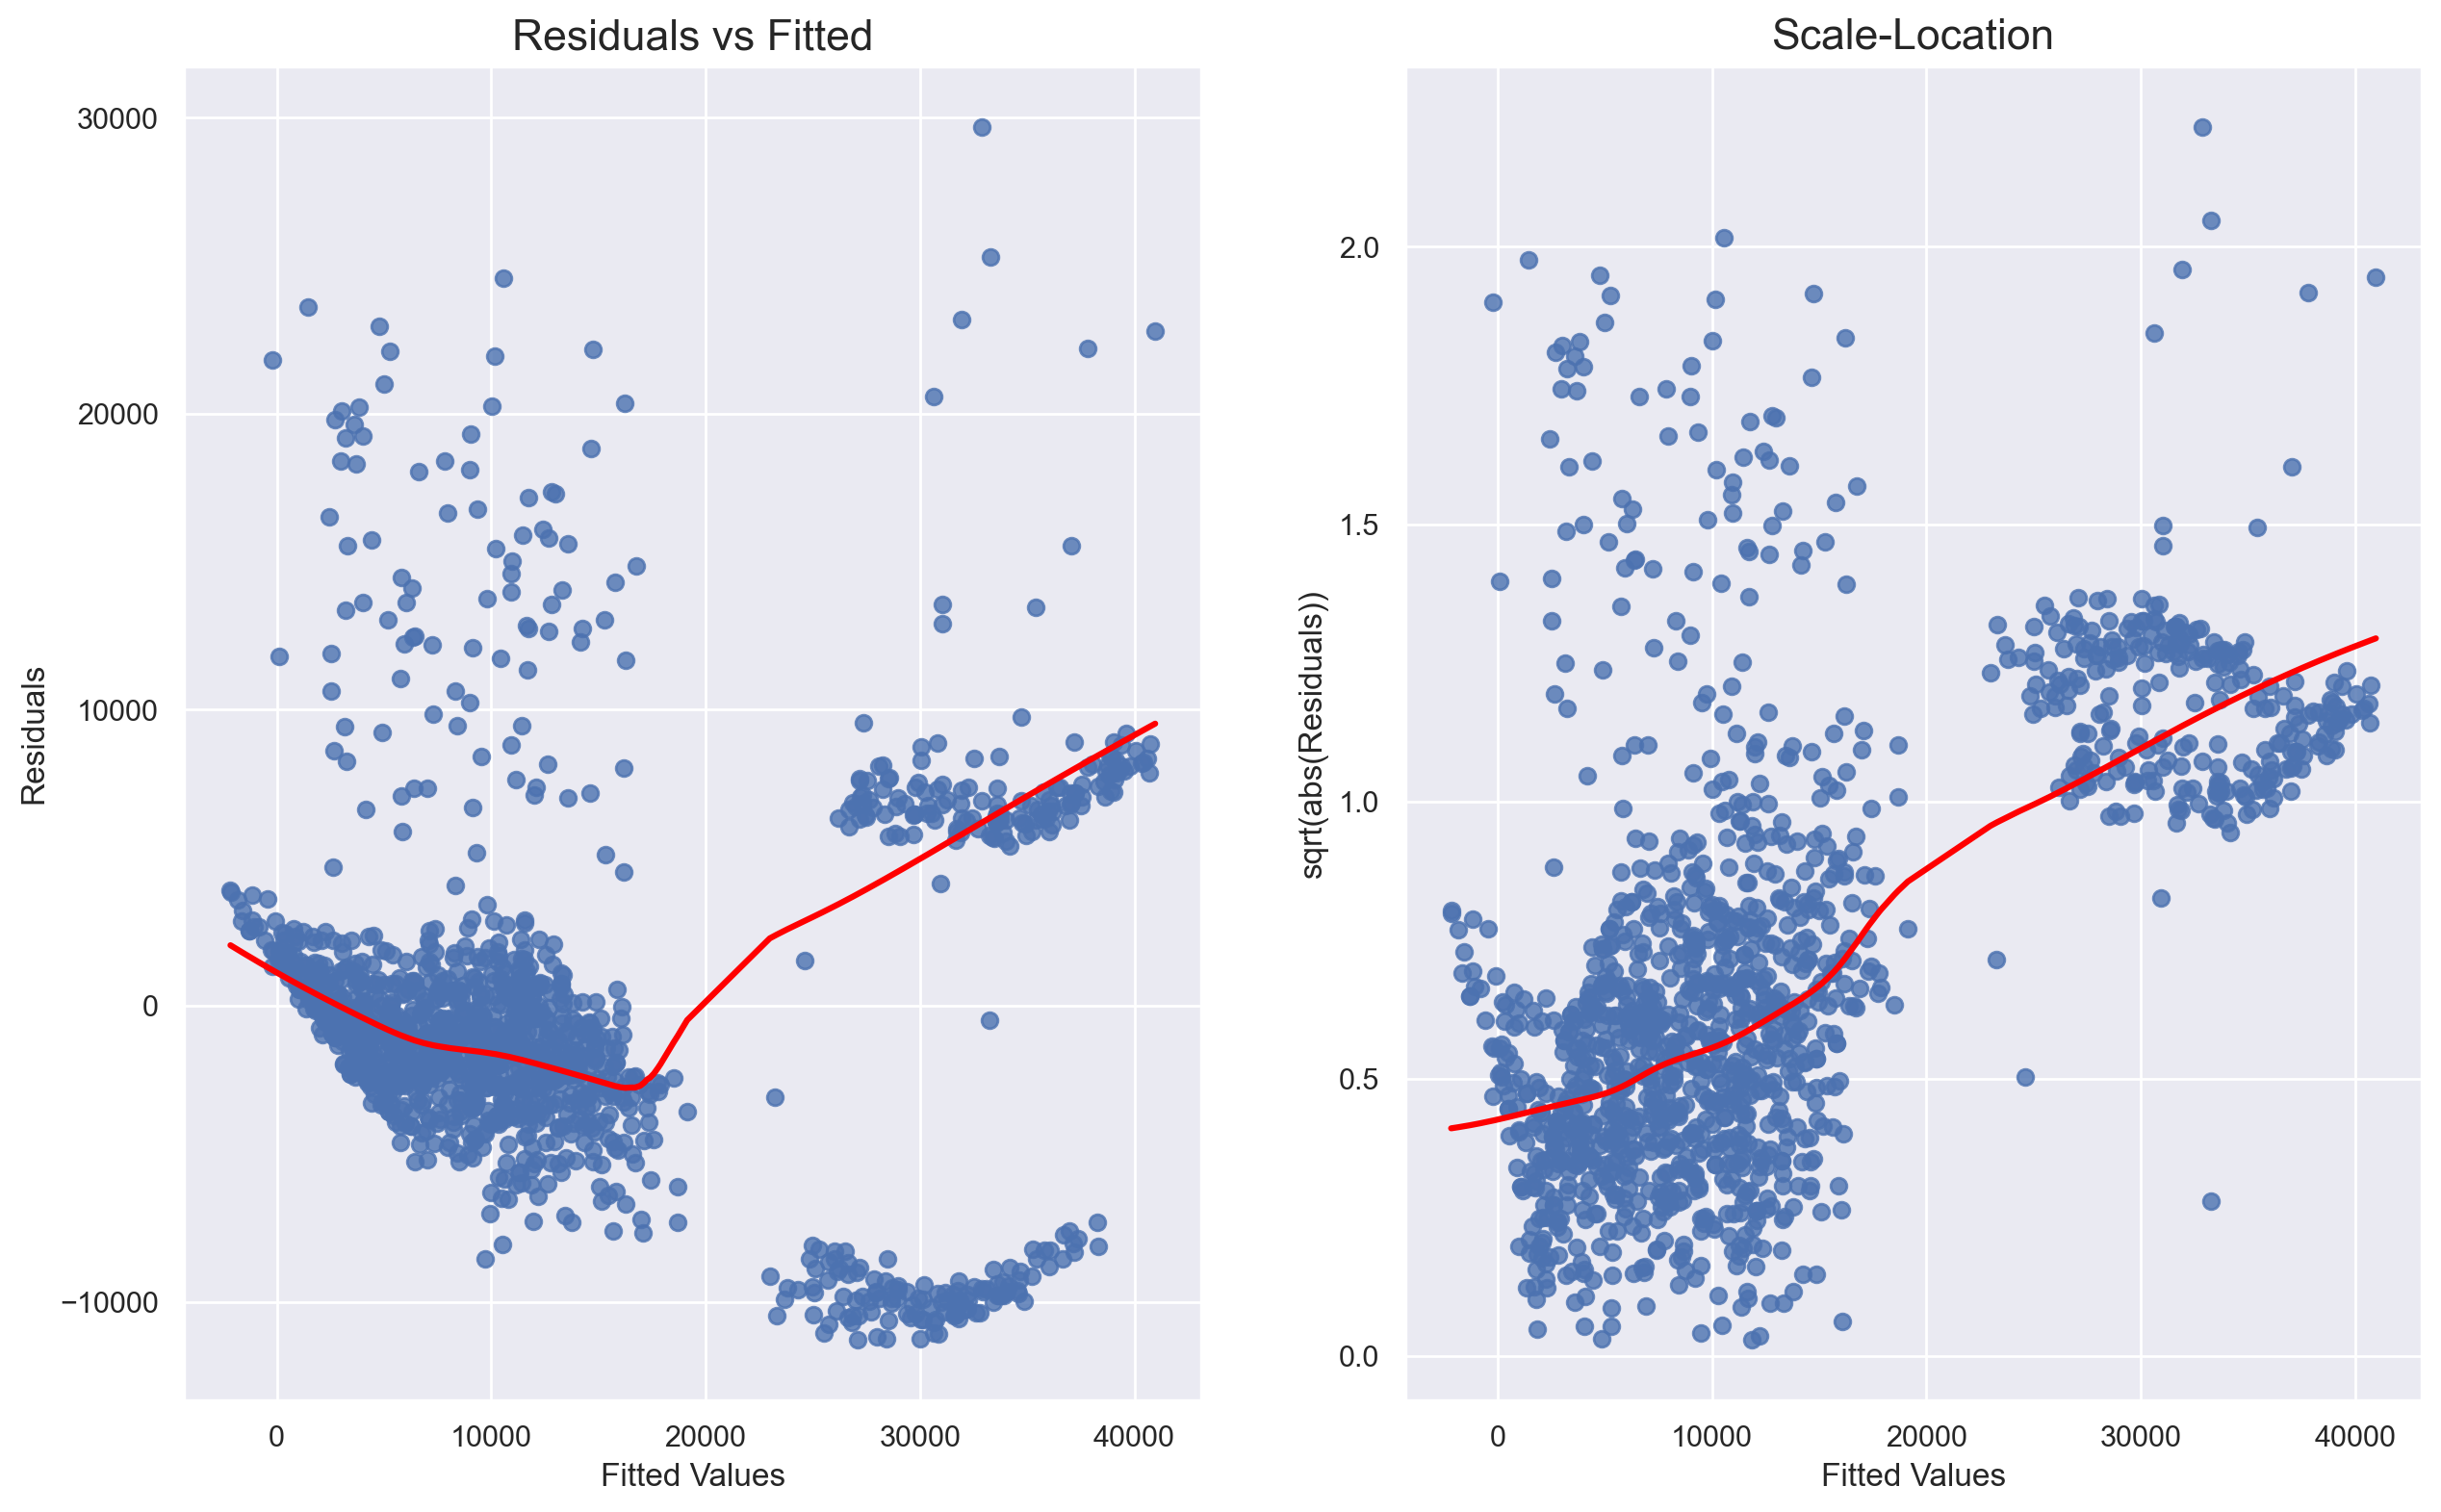

In [422]:
from statsmodels.compat import lzip
from statsmodels.compat import lzip

model = lin_reg
resids = model.resid
fit_values = model.predict()
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

# Regression plots for residual values and predicted values
sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

# Regression plots for scaled residuals and predicted values
sns.regplot(x=fit_values, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [423]:
# Goldfeld quandt test is used to check the homoscedasticity in regression analysis
# Run the below cell
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# WE fail to reject the null hypothesis which is Homoscedasticity is present and we can continue with the original regression

[('F statistic', 0.9570263734832438), ('p-value', 0.7139074795695115)]

In [424]:
print('p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.')

p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 5- NO MULTI COLLINEARITY
Run the below cell to check the Multicollinearity in the model
We use Variation inflation factors. The name itself says to determine the factors that inflate the variance if any additional variable is added to the regression.
</pre>
</p>
</span>
</div>

In [425]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We added this constant in summary
# The constant term is checked with every feature in the data and the measure is calculated. 
# If there is a very huge value for vif, then there might be chance of high collinearity 
# Here, there are no such high ranges, so it is fine to assume no multicollinearity and proceed with original regression.
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.set_option("display.Max_columns",None)
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,age,sex,bmi,children,smoker,region_encoded
vif,1.015214,1.008919,1.041177,1.002469,1.006457,1.026734


### By now, we have completed checking the assumptions for Linear Regression. 
### Now, we are ready to build the model with train and test data and check the working of the model.

In [426]:
# As the data is split into train data and test data, Lets start the model
# Step-1: Create an instance of the Linear Regression, use fit() to fit the model to the input data
# Step-2: USe predict() and predict the output for test data

In [427]:
from sklearn.linear_model import LinearRegression

# Step-1: Creating an instance of the Linear Regression, use fit() to fit the model to the input data
lin_reg = LinearRegression()

# Fitting the model to the training data
lin_reg.fit(X_train, y_train)

# Step-2: USe predict() and predict the output for test data
y_pred = lin_reg.predict(X_test)

# Print first 5 predictions
print("Predictions:", y_pred[:5])

Predictions: [11104.3296952   9824.27028768 37977.75663899 16148.79868385
  7081.21989787]


##  <mark><span  style= "font-family: Times New Roman">Evaluation metrics </span> </mark> <a class="anchor" id="Evaluation_metrics"></a>

In [428]:
# Calculate the metrics mean_absolute_error and mean_squared_error

In [429]:
# Calculating the metrics mean_absolute_error and mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 3921.34559040522
Mean Squared Error (MSE): 31906163.911417373


In [430]:
# Calculate the metrics r2_score and adjusted_r2_score for both train and test data

In [431]:
# Prediction on training Data
# Calculate the metrics r2_score and adjusted_r2_score for both train and test data
from sklearn.metrics import r2_score

# Calculate R2 score for train data
r2_train = r2_score(y_train, lin_reg.predict(X_train))

# Calculate R2 score for test data
r2_test = r2_score(y_test, y_pred)

# Calculate number of predictors
num_predictors = X_train.shape[1]

# Calculate Adjusted R2 score for train data
adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - num_predictors - 1)

# Calculate Adjusted R2 score for test data
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)

# Print the evaluation metrics
print("R2 Score for Train Data:", r2_train)
print("R2 Score for Test Data:", r2_test)
print("Adjusted R2 Score for Train Data:", adjusted_r2_train)
print("Adjusted R2 Score for Test Data:", adjusted_r2_test)

R2 Score for Train Data: 0.7368952214101576
R2 Score for Test Data: 0.7994961888646089
Adjusted R2 Score for Train Data: 0.7354101521048528
Adjusted R2 Score for Test Data: 0.7948869058500022


In [432]:
# Prediction on training Data
# Calculating R2 score for train data
r2_train = lin_reg.score(X_train, y_train)

# Printing the R2 score for train data
print("R2 Score for Train Data:", r2_train)

R2 Score for Train Data: 0.7368952214101576


In [433]:
# Adjusted R square in train data
# Calculating the number of samples and predictors
n_train = X_train.shape[0]  # Number of samples
k_train = X_train.shape[1]  # Number of predictors

# Calculating adjusted R2 score for train data
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - k_train - 1)

# Printing the adjusted R2 score for train data
print("Adjusted R2 Score for Train Data:", adjusted_r2_train)


Adjusted R2 Score for Train Data: 0.7354101521048528


In [434]:
# Prediction on test Data
# Use the trained linear regression model to make predictions on the test data
y_pred = lin_reg.predict(X_test)


In [435]:
# R square in test data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume X_train, X_test, y_train, y_test are your training and testing data
# Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("R-squared for test data:", r_squared)

R-squared for test data: 0.7994961888646089


In [436]:
# Adjusted R square in train data
# Calculating the number of samples and predictors
n_train = X_train.shape[0]  # Number of samples
k_train = X_train.shape[1]  # Number of predictors

# Calculating adjusted R2 score for train data
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - k_train - 1)

# Printing the adjusted R2 score for train data
print("Adjusted R2 Score for Train Data:", adjusted_r2_train)

Adjusted R2 Score for Train Data: 0.7354101521048528


In [437]:
# Calculating the number of samples and predictors for test data
n_test = X_test.shape[0]  # Number of samples in test data
k_test = X_test.shape[1]  # Number of predictors in test data

# Calculating adjusted R2 score for test data
adjusted_r2_test = 1 - (1 - r2_score(y_test, y_pred)) * (n_test - 1) / (n_test - k_test - 1)

# Printing the adjusted R2 score for test data
print("Adjusted R2 Score for Test Data:", adjusted_r2_test)


Adjusted R2 Score for Test Data: 0.7948869058500022


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What do you infer from both r squared value and adjusted r squared value?
</pre>
</p>
</span>
</div>

In [438]:
# Print the summary
print("R2 score for the train data:", r2_train)
print("Adjusted R2 score for the train data:", adjusted_r2_train)
print("\n")
print("The R2 score indicates that approximately 73.49% of the variance in the dependent variable is explained by the independent variables in the model, suggesting moderate effectiveness in explaining variability.")
print("The adjusted R2 score, which is very close to the R2 score, suggests that the model's performance is consistent with the number of predictors and the sample size.")
print("The small difference between R2 and adjusted R2 suggests that the model is not overfitting and that the included predictors are relevant for explaining the variance in the target variable.")
print("Overall, both R2 and adjusted R2 values suggest that the model has moderate explanatory power and is not significantly overfitting the data.")
print("However, it's essential to consider other factors such as the business context and the significance of individual predictors to assess the overall model effectiveness.")


R2 score for the train data: 0.7368952214101576
Adjusted R2 score for the train data: 0.7354101521048528


The R2 score indicates that approximately 73.49% of the variance in the dependent variable is explained by the independent variables in the model, suggesting moderate effectiveness in explaining variability.
The adjusted R2 score, which is very close to the R2 score, suggests that the model's performance is consistent with the number of predictors and the sample size.
The small difference between R2 and adjusted R2 suggests that the model is not overfitting and that the included predictors are relevant for explaining the variance in the target variable.
Overall, both R2 and adjusted R2 values suggest that the model has moderate explanatory power and is not significantly overfitting the data.
However, it's essential to consider other factors such as the business context and the significance of individual predictors to assess the overall model effectiveness.


## <mark><span  style= "font-family: Times New Roman">Hyperparameter Tuning (Optional) </span> </mark> <a class="anchor" id="Hyperparameter_Tuning"></a>

In [439]:
# Hyperparameters are the parameters of the model working inside an algorithm to improve model's accuracy. 
# The below listed are hyperparameters of Linear Regression using get_params() function. 
# We are then performing the Linear Regression with several combinations using GridSearchCV.
# GridSearchCV takes the combinations and the evaluates it as a grid to identify the best performed set.

In [440]:
from sklearn.model_selection import GridSearchCV

In [441]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [442]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold

# Instantiate the Ridge regression model
model = Ridge()

# Define the cross-validation strategy
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define the hyperparameter space
space = {
    'solver': ['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False]  # Changed to boolean values
}

# Create a GridSearchCV object
search = GridSearchCV(model, space, scoring='neg_mean_squared_error', cv=cv)

# Fit the GridSearchCV object to the data
result = search.fit(X, y)

# Print the best score and best hyperparameters found
print('Best Score:', result.best_score_)
print('Best Hyperparameters:', result.best_params_)

Best Score: -36969049.87386189
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'sag'}


In [443]:
# The above code and explanation is given for reference. If you'd like to perform Hyperparameter tuning, Do it using Lasso Regression model. 

## <mark><span  style= "font-family: Times New Roman">Build a predictive system </span> </mark> <a class="anchor" id="Build"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Give the input data to the model - ((31,1,25.74,0,1,0)) and 
The above data has to be standardized so find (x_new = x_old-mean/std)
You need to reshape the data. So, use reshape(1,-1) and predict the price
You will get the standardized data, shift it to the usual price using x_old = x_new*std+mean
</pre>
</p>
</span>
</div>

USING Linear Regression

In [459]:
reg.predict(scaler.transform([[18,1,33,1,0,0]]))

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3450.2868607])

In [460]:
df.head()

,age,sex,bmi,children,smoker,charges,region_encoded
0,19,0,27,0,1,16884.92400,0
1,18,1,33,1,0,1725.55230,1
2,28,1,33,3,0,4449.46200,1
3,33,1,22,0,0,21984.47061,2
4,32,1,28,0,0,3866.85520,2


In [461]:
print("From this age= 19, sex =0, bmi = 27, children = 0, smoker =1, region_encoded = 0 give 24895.6030948 and actual charges is 16884.92400 so, there is huge difference between model predictions and actual. ")

From this age= 19, sex =0, bmi = 27, children = 0, smoker =1, region_encoded = 0 give 24895.6030948 and actual charges is 16884.92400 so, there is huge difference between model predictions and actual. 


For accuarate predictions we will be using  RandomForestRegressor ,DecisionTreeRegressor,XGBRegressor 


In [463]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [464]:
lr = LinearRegression()
xgb = XGBRegressor()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()

In [465]:
print(lr.fit(x_train , y_train))
print(xgb.fit(x_train , y_train))
print(rfr.fit(x_train , y_train))
print(dtr.fit(x_train , y_train))

LinearRegression()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
RandomForestRegressor()
DecisionTreeRegressor()


In [466]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(r2_score(lr.predict(x_train) , y_train))
print(r2_score(xgb.predict(x_train) , y_train))
print(r2_score(rfr.predict(x_train) , y_train))
print(r2_score(dtr.predict(x_train) , y_train))

0.6429549670761159
0.9902657666269508
0.9686302402640801
0.9970582483328632


In [467]:
y_pred1=lr.predict(x_test)
print(y_pred1)
y_pred2=xgb.predict(x_test)
print(y_pred2)
y_pred3=rfr.predict(x_test)
print(y_pred3)
y_pred4=dtr.predict(x_test)
print(y_pred4)

[11104.3296952   9824.27028768 37977.75663899 16148.79868385
  7081.21989787  4013.26385416  1611.95293282 14322.42456262
  9054.38062708  7578.78899305  4727.15264707 10344.19528485
  8515.50066661  4181.78434416 27815.7347428  11154.79761959
 11308.13404909  6032.87353372  8253.7062428  26985.44920737
 33497.96312083 14161.67220501 11559.314939   32301.0037098
  4311.02374067  9195.11640483  1203.66262624 10252.61982807
  4001.34878585 10359.50730722  8907.19916086 40358.96567256
 15489.87903992 13711.69500002 24750.40874643  4987.88545432
 12941.80533943 30553.40106069 33349.63473014  3535.33132109
  3891.1070066   4123.50563342 30501.48064613 39207.55145503
 27882.79447952  4943.134981   10827.18059506  7838.92759378
  3470.21604826 10398.83105467  5503.02058609  3245.03001664
 33012.99069277 38522.70625483 16101.93104643  7075.74444903
  5982.36295537  9423.105184    9264.80336965 11756.16679019
  1618.19528839 38705.98721464 15308.1210377  11699.54390252
 13948.4012417  13823.881

In [468]:
prediction_xgb = xgb.predict(scaler.transform([[33,1,22,0,0,2]]))

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [469]:
print("The model predictions is :", prediction_xgb)

The model predictions is : [19704.057]


In [470]:
dtr.predict(scaler.transform([[33,1,22,0,0,2]]))

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([21984.47061])

In [471]:
dtr.predict(scaler.transform([[33,1,22,0,0,2]]))

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([21984.47061])

In [472]:
rfr.predict(scaler.transform([[33,1,22,0,0,2]]))

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([14929.421929])

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> Happy Learning!!! </p> </span> </div>